**Name: Rownita Tasneem**

### Importing important libraries for data analysis

In [ ]:
import seaborn as sns

In [ ]:
import scipy

In [ ]:
from scipy import stats

In [ ]:
from scipy.stats import shapiro

In [ ]:
from scipy.stats import norm

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd


In [ ]:
from pandas.plotting import scatter_matrix

###**Data Preparation**

### (2p) Load the data from the file bikes.data. Check that the variables match the documentation above

### **Data Loading**

In [ ]:
### codes for loading the dataset from my google drive

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
### Reading the dataset and converting it into a dataframe

df = pd.read_csv("/content/drive/MyDrive/Datasets/bikes.data")

In [ ]:
df ###printing the dataframe

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected
0,single,0.35,9,MICROTEKNIA,PUIJONLAAKSO,411.0,2150,1,19.0,2.7
1,single,1.20,5,SATAMA,KEILANKANTA,1411.0,7130,1,53.8,15.3
2,savonia,0.00,9,TASAVALLANKATU,NEULAMÄKI,1308.0,5420,1,43.0,9.9
3,savonia,0.00,10,TORI,KAUPPAKATU,1036.0,1180,1,6.5,2.1
4,single,0.30,9,TORI,TORI,319.0,1120,1,13.7,1.2
...,...,...,...,...,...,...,...,...,...,...
1769,savonia,0.00,10,KAUPPAKATU,TORI,836.0,960,1,8.0,2.7
1770,single,0.20,7,TORI,SATAMA,199.0,930,1,3.7,3.6
1771,season,0.00,7,TORI,TORI,61.0,0,1,0.0,0.0
1772,savonia,0.00,9,MICROTEKNIA,PUIJONLAAKSO,610.0,2460,1,36.5,6.9


In [ ]:
df.shape ### getting the shape of the dataframe as rows and columns

(1774, 10)

### There are total 1774 rows and 10 columns in the dataset.

There are total 1774 observations and 10 variables.

In [ ]:
df.columns ### printing the column labels of the dataframe

Index(['ticket', 'cost', 'month', 'location_from', 'location_to', 'duration',
       'distance', 'assistance', 'energy_used', 'energy_collected'],
      dtype='object')

In [ ]:
df.head(30) ### head() is called to check the headers and the first 30 rows will be printed

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected
0,single,0.35,9,MICROTEKNIA,PUIJONLAAKSO,411.0,2150,1,19.0,2.7
1,single,1.20,5,SATAMA,KEILANKANTA,1411.0,7130,1,53.8,15.3
2,savonia,0.00,9,TASAVALLANKATU,NEULAMÄKI,1308.0,5420,1,43.0,9.9
3,savonia,0.00,10,TORI,KAUPPAKATU,1036.0,1180,1,6.5,2.1
4,single,0.30,9,TORI,TORI,319.0,1120,1,13.7,1.2
5,single,1.00,6,NEULAMÄKI,TORI,1185.0,3280,1,21.2,0.0
6,single,0.70,8,KEILANKANTA,TASAVALLANKATU,817.0,4470,1,27.6,0.6
7,single,0.35,7,PUIJONLAAKSO,MICROTEKNIA,413.0,2150,1,14.5,10.2
8,season,0.00,6,NEULAMÄKI,TORI,797.0,4490,1,25.4,12.0
9,savonia,0.00,9,TORI,TORI,5.0,0,0,0.0,0.0


In [ ]:
df.tail(30) ###tail() method is called for displaying the last 30 rows from the dataframe

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected
1744,single,0.35,9,TORI,SATAMA,412.0,1100,1,6.5,6.9
1745,season,0.00,8,KYS,TORI,578.0,2300,1,21.1,6.3
1746,savonia,0.00,10,SATAMA,KAUPPAKATU,254.0,1020,1,12.6,0.6
1747,season,0.00,6,NEULAMÄKI,NEULAMÄKI,111.0,10,1,0.0,0.0
1748,season,0.00,10,NEULAMÄKI,TORI,962.0,4350,1,24.6,27.3
1749,single,0.60,5,TORI,PUIJONLAAKSO,718.0,2610,1,28.9,5.7
1750,savonia,0.00,10,KEILANKANTA,TORI,1281.0,6390,1,40.0,7.5
1751,season,0.00,8,TORI,TASAVALLANKATU,601.0,2030,1,9.3,3.0
1752,single,0.10,7,KYS,KYS,109.0,0,0,0.0,0.0
1753,season,0.00,8,TORI,TORI,113.0,210,1,0.0,0.3


### **Summary of the Dataframe**

In [ ]:
df.info() ### info()method provides a brief summary of the df dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1774 entries, 0 to 1773
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ticket            1774 non-null   object 
 1   cost              1774 non-null   float64
 2   month             1774 non-null   int64  
 3   location_from     1774 non-null   object 
 4   location_to       1774 non-null   object 
 5   duration          1774 non-null   float64
 6   distance          1774 non-null   int64  
 7   assistance        1774 non-null   int64  
 8   energy_used       1774 non-null   float64
 9   energy_collected  1774 non-null   float64
dtypes: float64(4), int64(3), object(3)
memory usage: 138.7+ KB


###There are 1774 rows and the range of index values starts from 0 to 1773. There are total 10 variables in the dataset and these variables match the given documentation.  The total  float type variables, integer type variables and object type variables are 4,3 and 3 respectively. Moreover, the memory usage is approximately 138.7 KB.

###Therefore, it can be concluded that the dataset is loaded correctly.

In [ ]:
df.describe() # describing the brief statistics of the dataframe

,cost,month,duration,distance,assistance,energy_used,energy_collected
count,1774.000000,1774.000000,1774.000000,1774.000000,1774.000000,1774.000000,1774.000000
mean,0.491234,7.233371,671.323563,2460.067644,0.916009,17.399493,5.639290
std,4.127344,1.720351,1141.708627,2352.529305,0.277452,17.194463,6.379593
min,0.000000,4.000000,2.000000,-3380.000000,0.000000,0.000000,0.000000
25%,0.000000,6.000000,245.250000,910.000000,1.000000,1.425000,0.600000
50%,0.050000,7.000000,546.500000,2030.000000,1.000000,14.350000,3.900000
75%,0.550000,9.000000,877.750000,3605.000000,1.000000,26.900000,8.325000
max,100.000000,10.000000,25614.000000,20770.000000,1.000000,144.900000,56.400000


From the above descriptive statistics, it could be concluded that the distance,energy_used and cost variables contain invalid and  irrelevant values.

It could be stated from the above statistics that the minimum value of distance is negative. But distance could not be negative. So, it is a invalid value. Moreover, there are zero values for distances in some observations which imply cancelled trips by customers.

In addition, the minimum values of energy_used and cost are 0.But the values of cost  and energy_used for an electric  bike could not be zero if it was used by a customer as the customer had to travel some distances for making the trip. Also, some energy must be needed to be consumed by an electric bike for making the trip. So, for a valid trip, distances,cost and energy_used must be greater than 0.  So, these values are irrelevant values.

Therefore, we need to clean and filter these values.



# **Data Preprocessing**

### Converting to category datatype

### There are specific optimizations for manipulating categorical data in pandas. So, we are converting the categorical variables  to "category" datatype for increasing performance and memory efficiency as they are not in category type in the given dataset.



In [ ]:
categorical_idx = [0,2,3,4,7] ### creating a list for categorical indices

In [ ]:
### the name of all variables
columns = ["ticket","cost","month","location_from","location_to","duration","distance","assistance","energy_used","energy_collected"]

In [ ]:
### converting the categorical variables to a categorical type

for i in categorical_idx:
    col_name = columns[i]
    df[col_name] = pd.Categorical(df[col_name])

In [ ]:
df.dtypes # checking the datatypes

ticket              category
cost                 float64
month               category
location_from       category
location_to         category
duration             float64
distance               int64
assistance          category
energy_used          float64
energy_collected     float64
dtype: object

The categorical variables are "ticket", "month", "location_from", "location_to", "assistance", "energy_used", "energy_collected". These are in the categorical types.

The numerical variables "cost", "duration", "energy_used", and "energy_collected" are numerical variables.

### Replacing the numbers of calendar months with their respective names

In [ ]:
# mapping numerical months to month names
dict_month= {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

# Replacing numerical month values with month names
df['month'] = df['month'].replace(dict_month)

###Renaming the values of  the categorical variable "assistance" into human friendly values

### As 0 represents disabled status and 1 represents enabled state, these values are replaced by their human friendly values like "disabled" and "enabled", respectively.

In [ ]:
### creating a dictionary for mapping numerical values to human-friendly values
assistance_map = {0:"disabled",1:"enabled"}
### replacing numerical values with categorical description
df["assistance"] = df["assistance"].replace(assistance_map)

In [ ]:
df

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected
0,single,0.35,September,MICROTEKNIA,PUIJONLAAKSO,411.0,2150,enabled,19.0,2.7
1,single,1.20,May,SATAMA,KEILANKANTA,1411.0,7130,enabled,53.8,15.3
2,savonia,0.00,September,TASAVALLANKATU,NEULAMÄKI,1308.0,5420,enabled,43.0,9.9
3,savonia,0.00,October,TORI,KAUPPAKATU,1036.0,1180,enabled,6.5,2.1
4,single,0.30,September,TORI,TORI,319.0,1120,enabled,13.7,1.2
...,...,...,...,...,...,...,...,...,...,...
1769,savonia,0.00,October,KAUPPAKATU,TORI,836.0,960,enabled,8.0,2.7
1770,single,0.20,July,TORI,SATAMA,199.0,930,enabled,3.7,3.6
1771,season,0.00,July,TORI,TORI,61.0,0,enabled,0.0,0.0
1772,savonia,0.00,September,MICROTEKNIA,PUIJONLAAKSO,610.0,2460,enabled,36.5,6.9


### (6p) Use both visualisations and numerical summaries to explore the variables. Filter out irrelevant records and process invalid values, if any. Explain why the records are irrelevant or the values invalid. Also explain how the modifications you made to the data fix the problems.

### **Exploring the variables**

###Descriptive Statistics

### In order to explore the variables, it is essential to analyze various descriptive statistics, including measures of central tendency, measures of dispersion, and correlation coefficients.

###i. Location Statistics

Location statistics, also known as measures of central tendency, describe the center or average of a dataset, providing a single value that represents the typical or central value around which the data points cluster.

### Calculating mode of all variables:-



In [ ]:
variables = ["ticket","cost",	"month","location_from","location_to","duration", "distance","assistance","energy_used","energy_collected"]

In [ ]:
for i in variables: ###printing mode of all variables of the dataset
    mode_var = df[i].mode()
    # Checking if mode_var is empty (no mode found) before printing
    if not mode_var.empty:
        print(f"The mode of {i} is {mode_var.iloc[0]}")
    else:
        print(f"No mode found for {i}")

The mode of ticket is single
The mode of cost is 0.0
The mode of month is June
The mode of location_from is TORI
The mode of location_to is TORI
The mode of duration is 5.0
The mode of distance is 0
The mode of assistance is enabled
The mode of energy_used is 0.0
The mode of energy_collected is 0.0


In [ ]:
df.mode() ### calculating modes of all columns

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected
0,single,0.0,June,TORI,TORI,5.0,0.0,enabled,0.0,0.0
1,NaN,NaN,July,NaN,NaN,8.0,NaN,NaN,NaN,NaN


### The mode of ticket is single. The mode of cost is 0.0 .The mode of month is June.The mode of location_from is TORI. The mode of location_to is TORI. The mode of duration is 5.0. The mode of distance is 0. The mode of assistance is enabled. The mode of energy_used is 0.0. The mode of energy_collected is 0.0.

### "Single" ticket is mostly used by customers. The station of departure and arrival for most of the customers is TORI. Most of the customers enabled the electrical assistance of the bike. Most of the trips were made in June.

In [ ]:
df.median() # caculating median of the variables

<ipython-input-28-fad29583f937>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median() # caculating median of the variables


cost                   0.05
duration             546.50
distance            2030.00
energy_used           14.35
energy_collected       3.90
dtype: float64

From the above code, we found that the median of cost is 0.05.
The median of month is 7.00. The median of duration is 546.50. The median of distance is 2030.00. The median of assistance is 1.00. The medians of energy_used and energy_collected are 14.35 and 3.90 respectively.

The indices for categorical variables are 0,2,3,4,7.

###Calculating Frequencies of categorical variables:



In [ ]:
df["location_from"].value_counts() # calculating counts of location_from which are stations of departures of customers

TORI              418
KAUPPAKATU        237
SATAMA            200
MICROTEKNIA       182
PUIJONLAAKSO      161
NEULAMÄKI         157
KEILANKANTA       153
TASAVALLANKATU    144
KYS                94
PIRTTI             28
Name: location_from, dtype: int64

A total of 418 electric bikes were dispatched from the TORI station, constituting the majority of the fleet. In contrast, PIRTTI station had the lowest departure count, with a minimum of 28 bikes.

In [ ]:
df["location_to"].value_counts() # calculating the counts of location_to which are stations of arrivals for customers

TORI              400
KAUPPAKATU        287
PUIJONLAAKSO      190
MICROTEKNIA       176
SATAMA            163
TASAVALLANKATU    156
NEULAMÄKI         155
KEILANKANTA       142
KYS                75
PIRTTI             30
Name: location_to, dtype: int64

The preponderance of electric bikes, approximately 400 units, reached the TORI station, signifying a predominant arrival volume. Conversely, the PIRTTI station experienced the arrival of a minimal fleet, totaling around 30 bikes, denoting the lowest recorded entry count.

In [ ]:
df["month"].value_counts() # counting the occurrences of months

June         355
July         355
May          298
September    277
October      237
August       214
April         38
Name: month, dtype: int64

The majority of trips, reaching a peak at 355, occurred during the month of June, indicating the highest trip frequency within the dataset. In contrast, the fewest trips, totaling a minimum of 38, were recorded in April, signifying the lowest observed trip count.

In [ ]:
df["assistance"].value_counts() # counting the occurrences of assistance

enabled     1625
disabled     149
Name: assistance, dtype: int64


The predominant user choice entails enabling electric assistance, as evidenced by 1625 instances denoted by the value 1. Conversely, 149 users opted not to utilize electric assistance, as represented by the value 0.

In [ ]:
df["ticket"].value_counts() # counting the number of tickets for all types

single     967
season     553
savonia    254
Name: ticket, dtype: int64

The dataset encompasses three distinct ticket categories: single, season, and Savonia. Specifically, there are 967 users with single tickets, 553 users with season tickets, and 254 users with Savonia tickets.

The preeminent ticket category, utilized by a maximum of 967 customers, is the "single" ticket. Conversely, the "Savonia" ticket category saw the fewest users, totaling 254 individuals.

### ii. Dispersion Statistics
Dispersion statistics, also known as measures of variability or spread, quantify the extent to which a dataset's values deviate from the mean (average) or median. They provide insights into the distribution of data points and how they are spread out around the central tendency.

### Calculating range, variance, standard deviation, interquartile range of numerical variables

In [ ]:
numerical_variables = ["cost","duration","distance","energy_used","energy_collected"] # list of numerical variables

In [ ]:
### calculating variance
df[numerical_variables].var()

cost                1.703497e+01
duration            1.303499e+06
distance            5.534394e+06
energy_used         2.956496e+02
energy_collected    4.069921e+01
dtype: float64

In [ ]:
df[numerical_variables].std() ###calculating standard deviation

cost                   4.127344
duration            1141.708627
distance            2352.529305
energy_used           17.194463
energy_collected       6.379593
dtype: float64

In [ ]:
# a function to calculate some statistics (given a variable)
# and to return them as a Series
# calculating range, interquartile range and variance
fn = lambda col: pd.Series({'range': col.max() - col.min(),
                           'iqr': col.quantile(0.75) - col.quantile(0.25),
                           'var': col.var()})
# selecting five variables and applying the function to them
df[numerical_variables].apply(fn, axis=0)

,cost,duration,distance,energy_used,energy_collected
range,100.00000,2.561200e+04,2.415000e+04,144.90000,56.400000
iqr,0.55000,6.325000e+02,2.695000e+03,25.47500,7.725000
var,17.03497,1.303499e+06,5.534394e+06,295.64956,40.699206


From the above statitics, the findings are described below-
### cost:

Range: The cost varies from 0 to 100 euros.

IQR: The interquartile range of cost is 0.55 euros

Variance:
The cost values are spread out with a variance of approximately 17.03 euros.

## duration:

Range: The duration ranges from 0 to 25,612 seconds (approximately 7 hours and 6 minutes).

IQR: The IQR is 632.5 seconds.

Variance: The duration values are spread out with a variance of approximately 1,303,499 seconds.


## distance:

Range: The distance ranges from 0 to 24,150 meters (approximately 24.15 kilometers).

IQR: The middle 50% of the distance values spans approximately 25.475 meters.

Variance: The distance values are spread out with a variance of approximately 5,534,394 meters.



### energy_used:

Range: The energy used varies from 0 to 144.9 Watt-hours.

IQR: The middle 50% of the energy used values spans approximately 25.475 Watt-hours.

Variance: The energy used values are spread out with a variance of approximately 295.65 Watt-hours.

### Energy_collected:

Range: The energy collected ranges from 0 to 56.4 Watt-hours.

IQR: The middle 50% of the energy collected values spans approximately 7.725  Watt-hours.

Variance: The energy collected values are spread out with a variance of approximately 40.70 Watt-hours .

### iii. Correlation Statistics

Correlation statistics measure the strength and direction of the relationship between two or more variables. It quantifies how much and in what way the variables change together. A correlation coefficient ranges from -1 to +1:

###1: Perfect positive correlation (as one variable increases, the other variable increases).

###-1: Perfect negative correlation (as one variable increases, the other variable decreases).

###0: No correlation.

In [ ]:
df[numerical_variables].corr(method = "spearman") ### determining correlation by performing Spearman correlation test

,cost,duration,distance,energy_used,energy_collected
cost,1.000000,0.363737,0.353988,0.272488,0.246433
duration,0.363737,1.000000,0.897473,0.827054,0.648120
distance,0.353988,0.897473,1.000000,0.881337,0.713437
energy_used,0.272488,0.827054,0.881337,1.000000,0.619735
energy_collected,0.246433,0.648120,0.713437,0.619735,1.000000


There are positive correlations between the all numerical variables as the correlation values are greater than 0.

From the below statistics, it could be observed that distance,duration,energy_used and energy_collected variables are positively correlated.

As the distance travelled increases,the values of duration,energy_used and energy_collected increase with respect to it. That means, if a rider travels more distances, duration, cost, energy_used and energy_collected values will increase.

As the travel duration increases, the values of distance,cost,energy_used and energy_collected increase with respect to it. That means, if a rider travels for long time, the values of duration, cost, energy_used and energy_collected valriables will also increase simultaneously.


As the  cost of travel increases, the values of duration,distance, energy_used and energy_collected will also increase with respect to it. That means, if a rider spends more cost for his trip, then duration, cost, energy_used and energy_collected values will also increase simultaneously.



As the values of  energy_used of electric bikes increase, the values of duration,distance, cost and energy_collected will also increase with respect to it. That means, if bike consumes more energy for a trip, then duration, cost, distance and energy_collected values will also increase simultaneously.


As the  values of energy_collected variable increase, the values of duration,distance, energy_used and cost will also increase with respect to it. That means, if an electric bike collects more energy for a trip, then the values of  duration, cost, energy_used and distance will also increase simultaneously.

### Visualizing the variables

Visualizing variables in pandas refers to the utilization of various plotting functions provided by the pandas library to create graphical representations, such as line charts, bar plots, histograms, and scatter plots, of the data stored in DataFrame or Series objects. These visualizations aid in understanding the distribution, relationships, and trends within the data, facilitating the exploration and interpretation of complex datasets.

### Visualizing the numerical columns

### 1.Bar plots: Visualizing the distribution of a discrete variable
### 2. Histogram: Visualizing the distribution of a quantitive variable
### 3. Box plots: Summarizing the key statistics of a quantitive variable
### 4. Scatter plots: Visualizing relationships between two variables



### Drawing line plots for "cost","duration","distance","energy_used","energy_collected" variables

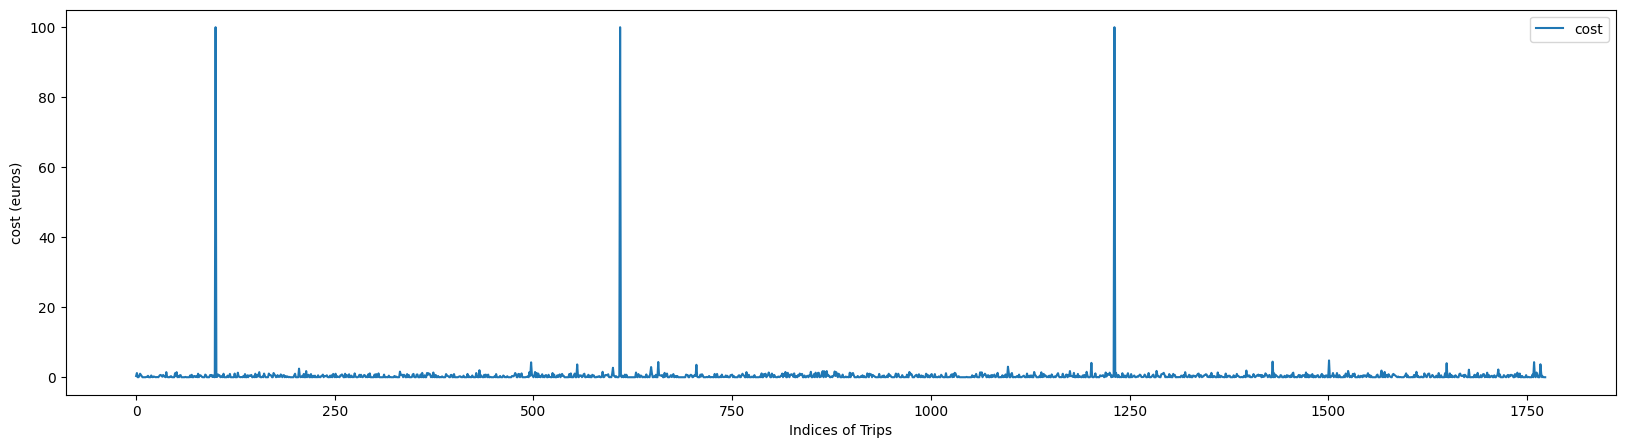

In [ ]:
df[["cost"]].plot(kind = "line", figsize = (20,5)) ### creating line plot and setting figure size of the plot
plt.xlabel("Indices of Trips") # setting x-label
plt.ylabel("cost (euros)") # setting y-label
plt.show() # showing the plots

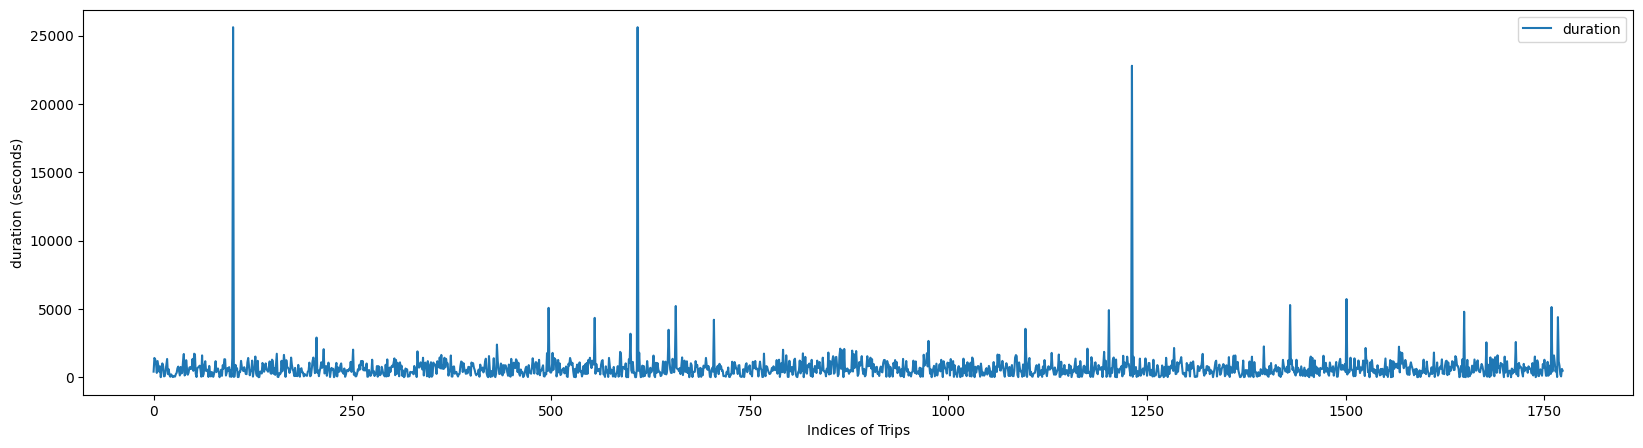

In [ ]:
df[["duration"]].plot(kind = "line", figsize = (20,5)) ### creating line plot and setting figure size
plt.xlabel("Indices of Trips") # setting x-label
plt.ylabel("duration (seconds)") # setting y-label
plt.show() # displaying the plots

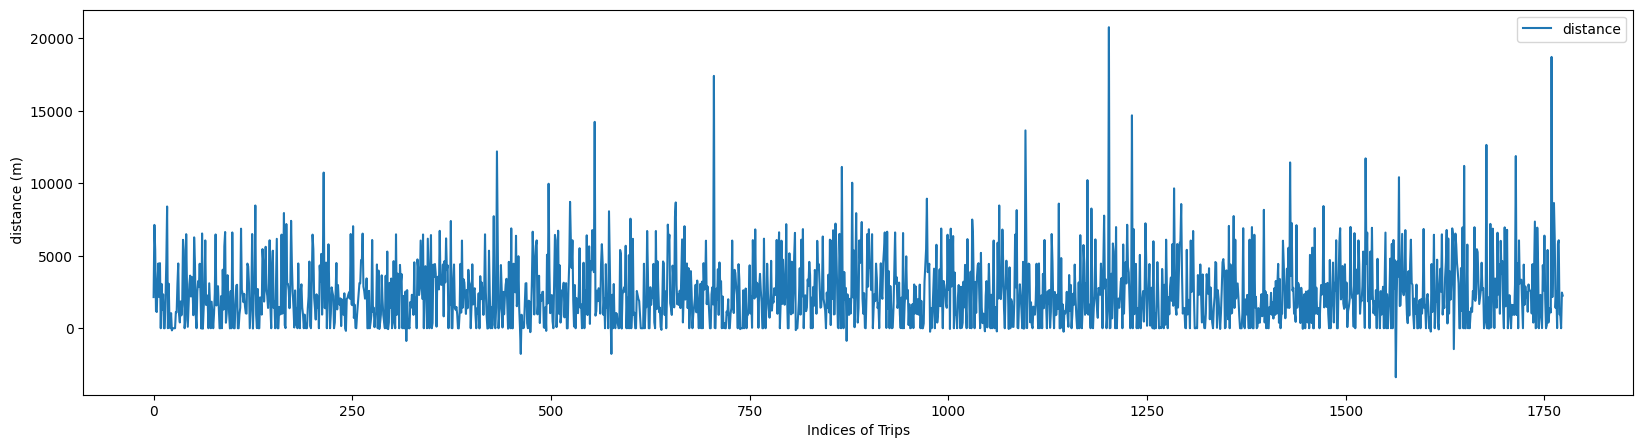

In [ ]:
df[["distance"]].plot(kind = "line", figsize = (20,5)) ### creating line plot and setting the figure size of the plots
plt.xlabel("Indices of Trips") # setting x-label
plt.ylabel(" distance (m)") # setting y-label
plt.show() # displaying the plot

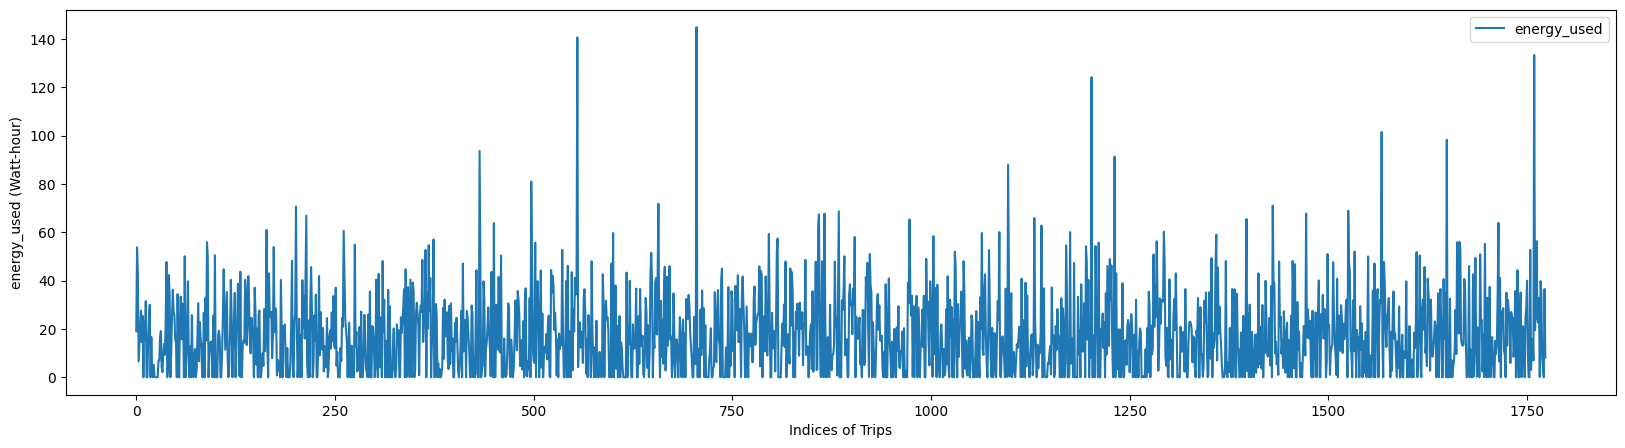

In [ ]:
df[["energy_used"]].plot(kind = "line", figsize = (20,5)) ### creating line plot and setting the figure size of the plot
plt.xlabel("Indices of Trips") # setting x-label
plt.ylabel("energy_used (Watt-hour)") # setting y-label
plt.show() # displaying the plot

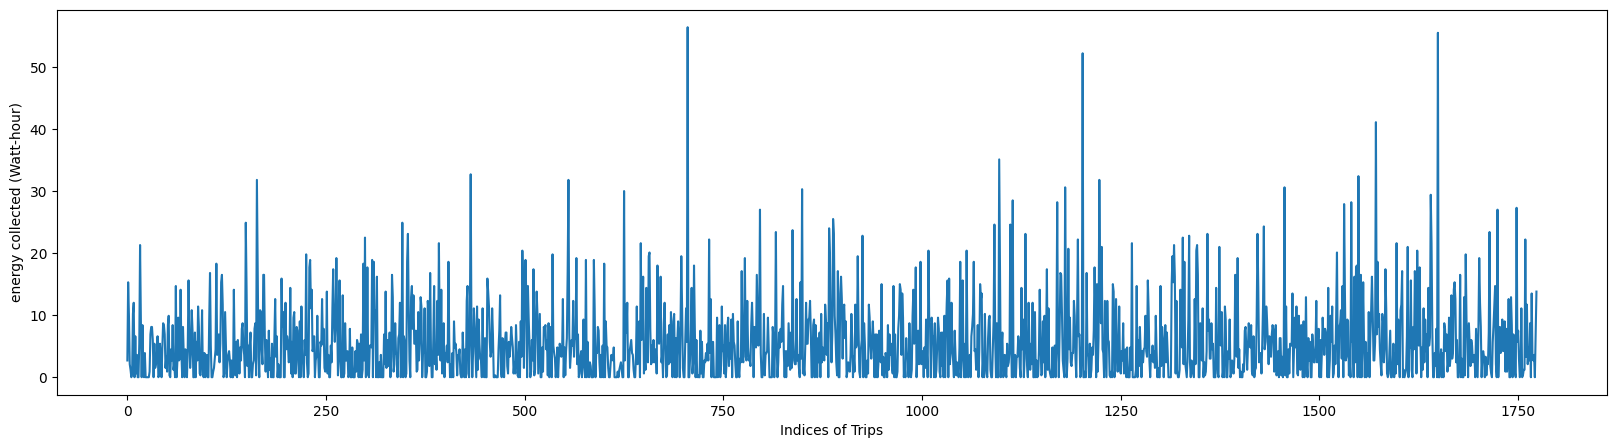

In [ ]:
df["energy_collected"].plot(kind = "line", figsize = (20,5)) ### creating line plot and setting figure size
plt.xlabel("Indices of Trips")                       # setting x-label
plt.ylabel("energy collected (Watt-hour)") # setting y-label
plt.show() # displaying the plot

From the above plots, it could be examined that the variables cost,duration,energy_used and energy_collected variables are  correlated.

From the cost and duration plots, we observed that there are three largest values for the cost and duration for the same trips. It indicates that when the trip duration increases, the cost also increases which implies positive correlation between these two variables.

From the above observations, we observe that the amount of energy_used is higher than the amount of energy_collected. It is also visible that energy_used values are more than double compared to energy_collected for all of the trips  and the patterns of both plots are almost same.

Furthermore, we have recognized that when the distance has higher values at that time energy_used and energy_collected values are higher for the corresponding trips. Hence, the distance, energy_used and  energy_collected variables are positively correlated.

### Drawing histogram for distance,cost,duration,energy_used and energy_collected  columns

In [ ]:
%matplotlib inline

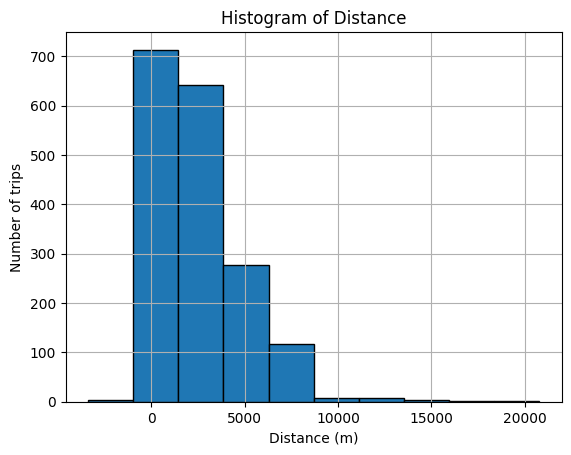

In [ ]:
# plotting histogram of distance

df["distance"].plot(kind = "hist", edgecolor = "black") # setting edge color and plotting the histogram
plt.xlabel('Distance (m)')  ###setting x label
plt.ylabel('Number of trips') ###setting y label
plt.title("Histogram of Distance") ##setting title
plt.grid(True)  ###showing grid
plt.show() ###displaying the plots

From the above plot, it could be concluded that most of the trips are made between the range of 0 to approximately 5000 meters. There are also some trips for which negative distances are covered. These negative distances values need to be fixed.

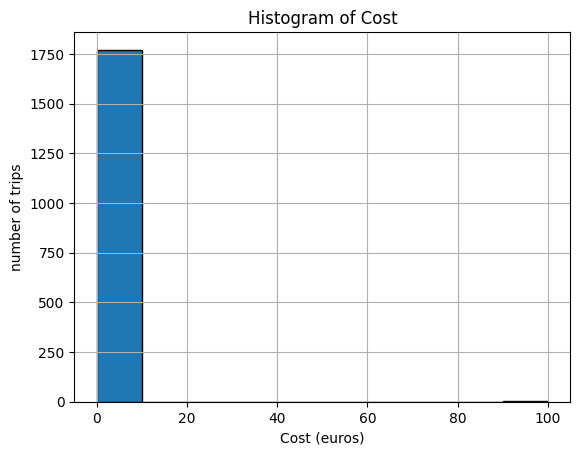

In [ ]:
df['cost'].plot(kind="hist", edgecolor = "black") # setting the edgecolor and plotting histogram
plt.xlabel("Cost (euros)") # setting xlabel
plt.ylabel("number of trips") # it denotes the number of trips made for this variable
plt.title("Histogram of Cost") # setting ttile
plt.grid(True) # showing grid
plt.show() # displaying the plot


From the above plot, it can be observed that the majority of trips cost between 0 euros to 15 euros, with more than 1750 trips falling within this range. Additionally, there is a small number of trips that cost 100 euros.

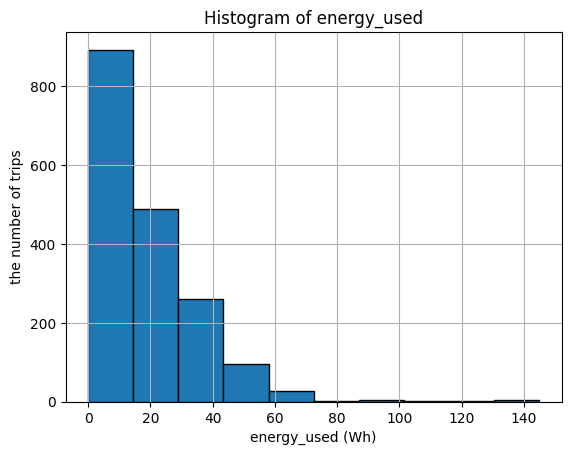

In [ ]:
df["energy_used"].plot(kind = "hist",edgecolor = "black") # plotting histogram and setting edgecolor black
plt.xlabel("energy_used (Wh)") # setting xlabel
plt.ylabel("the number of trips") # ylabel denotes the number of trips made for this variable
plt.title("Histogram of energy_used") # setting the title
plt.grid(True) # setting the grid
plt.show() # showing the plot

Upon examining the depicted data, it becomes evident that the predominant range of energy consumption for the majority of trips spans from 0 Wh to 60 Wh. A minority of trips deviated from this pattern, utilizing energy levels approximately around 100 Wh and 140 Wh.

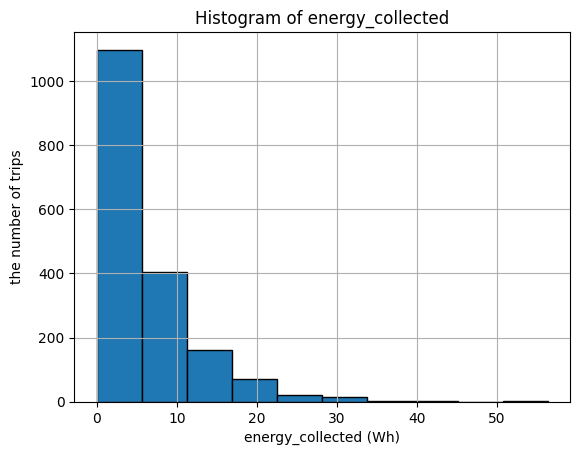

In [ ]:
df["energy_collected"].plot(kind = "hist", edgecolor = "black") # plotting and setting edge color
plt.xlabel("energy_collected (Wh)") # plotting x-label
plt.ylabel("the number of trips") # ylabel denotes the number of trips made for this variable
plt.title("Histogram of energy_collected") # plotting the title
plt.grid(True) # setting grid True
plt.show() # displaying the plot

Upon examining the depicted data, it becomes evident that the predominant range of energy collected for the majority of trips spans from 0 Wh to 30 Wh. A minority of trips deviated from this pattern, utilizing energy levels approximately around 40 Wh and 50 Wh.

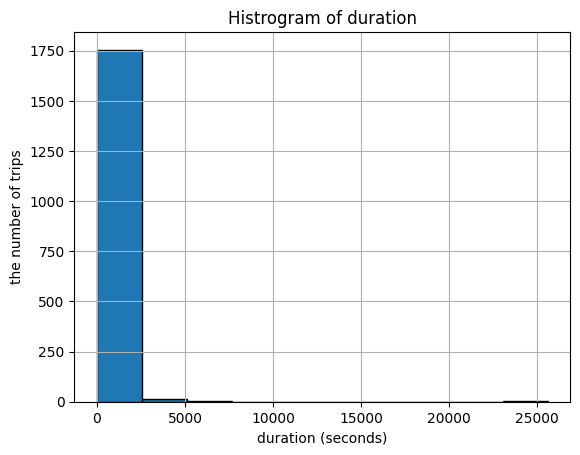

In [ ]:
df["duration"].plot(kind = "hist",edgecolor = "black") # plotting histogram and setting edge color
plt.xlabel("duration (seconds)") # setting  xlabel
plt.ylabel("the number of trips") # ylabel denotes the number of trips made for this variable
plt.title("Histrogram of duration")
plt.grid(True) # setting the grid True
plt.show() # displaying the plot

The data presented in the plot indicates that the majority of trips persist for durations surpassing 0 seconds and reaching up to 2500 seconds

# Visualizing categorical columns

### Barplots for categorical variables:

The categorical variables are "location_from","location_to","month","ticket","assistance".

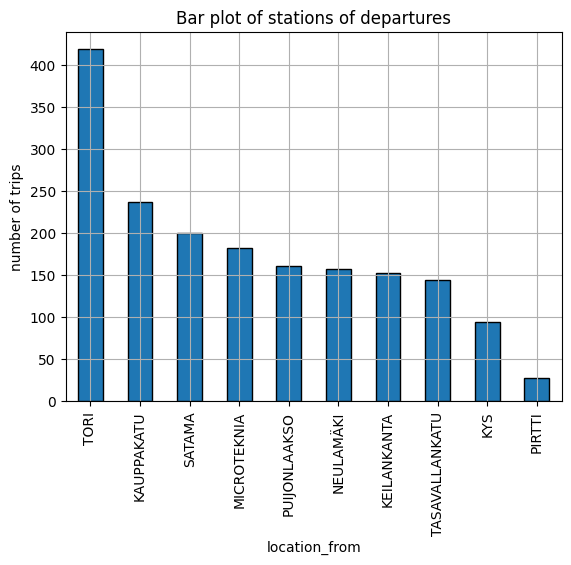

In [ ]:
### barplot of location_from(stations of departures)

df["location_from"].value_counts().plot(kind="bar",edgecolor = "black")  # counting occures for each type and setting edgecolor
plt.xlabel("location_from") # setting x label
plt.ylabel("number of trips") # settings the number of trips made for this variable
plt.title("Bar plot of stations of departures") # setting title
plt.grid(True) # showing grid
plt.show() # displaying the plot

A discerning analysis of the above plot reveals TORI as the primary epicenter from which the highest number of bikes commenced their journeys. Kauppakatu emerged as the secondary hub, witnessing a substantial number of departures. Conversely, Pirtti experienced the most minimal volume of bike departures, marking it as the least frequented departure point.

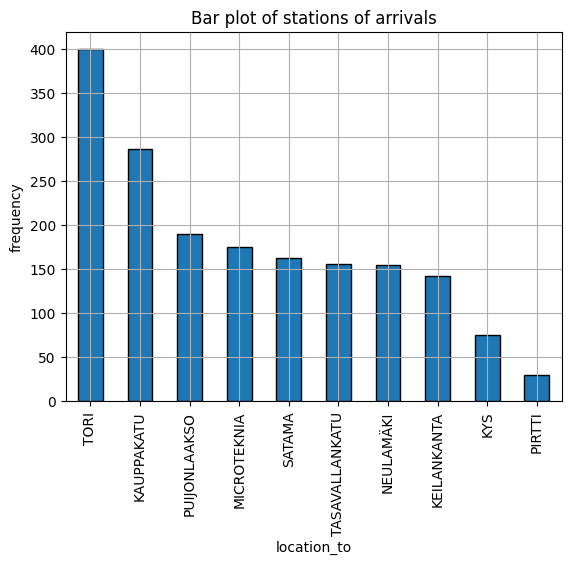

In [ ]:
###barplot of stations of arrivals

df["location_to"].value_counts().plot(kind = "bar",edgecolor = "black" ) # counting occures for each type and setting edgecolor
plt.xlabel("location_to") # setting x label
plt.ylabel("frequency") # frequency denotes the number of trips made for this variable
plt.title("Bar plot of stations of arrivals") # setting title of plot
plt.grid(True) # setting True for showing grid
plt.show() # displaying the plot

Upon scrutiny of the aforementioned plot, it is discernible that Tori served as the primary destination, witnessing the highest influx of electric bikes. Following suit, Kauppakatu emerged as the secondary arrival point with the second highest number of arrivals. In contrast, Pirtti recorded the minimum number of bike arrivals, while KYS experienced the second smallest influx.

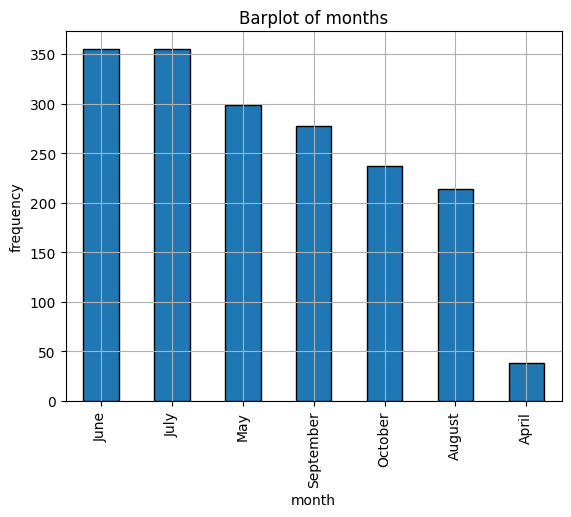

In [ ]:
### barplot of month

df["month"].value_counts().plot(kind = "bar", edgecolor = "black")  # counting occures for each type and setting edgecolor
plt.xlabel("month") # setting xlabel
plt.ylabel("frequency") # setting ylabel
plt.title("Barplot of months") # setting title
plt.grid("True") # setting the grid
plt.show() # showing the plot


Upon a meticulous review of the depicted chart, it becomes manifest that electric bike riders exhibited their most robust enthusiasm during the months of June and July, culminating in the highest number of trips. May followed closely as the second most prolific period for journeys. Conversely, April saw the most meager participation, signifying a notable dip in trip count.

<function matplotlib.pyplot.show(close=None, block=None)>

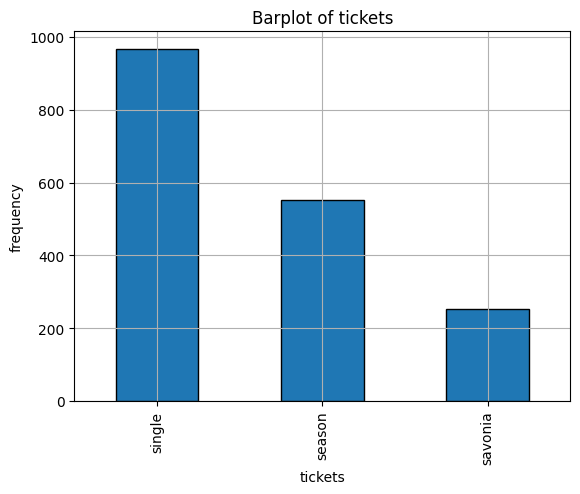

In [ ]:
###barplot of tickets
df["ticket"].value_counts().plot(kind = "bar",edgecolor = "black")  # counting occures for each type and setting edgecolor
plt.xlabel("tickets") # setting xlabel
plt.ylabel("frequency") # setting ylabel
plt.title("Barplot of tickets") # setting the title
plt.grid(True) # setting the grid
plt.show # displaying the barplot

Examining the plot, it is evident that the most significant proportion of bike riders selected Single tickets, representing the highest purchase volume. Conversely, the smallest segment of electric riders preferred Savonia tickets.

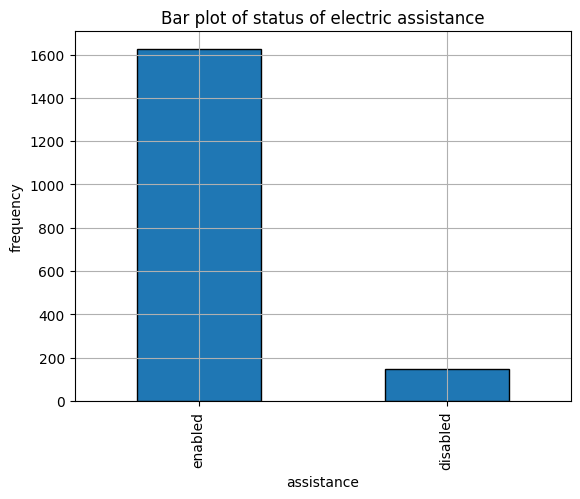

In [ ]:
###barplots of assistance
df["assistance"].value_counts().plot(kind = "bar", edgecolor = "black")
plt.xlabel("assistance")
plt.ylabel("frequency")
plt.title("Bar plot of status of electric assistance")
plt.grid(True)
plt.show()

The plot clearly illustrates that a vast majority of bike riders, exceeding 1600 in number, activated electric assistance. Conversely, a mere fraction, totaling less than 200, opted for assistance disabled electric bikes.

### Checking the distributions of distance, energy_used and energy_collected variables:

###Drawing density plots of columns

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

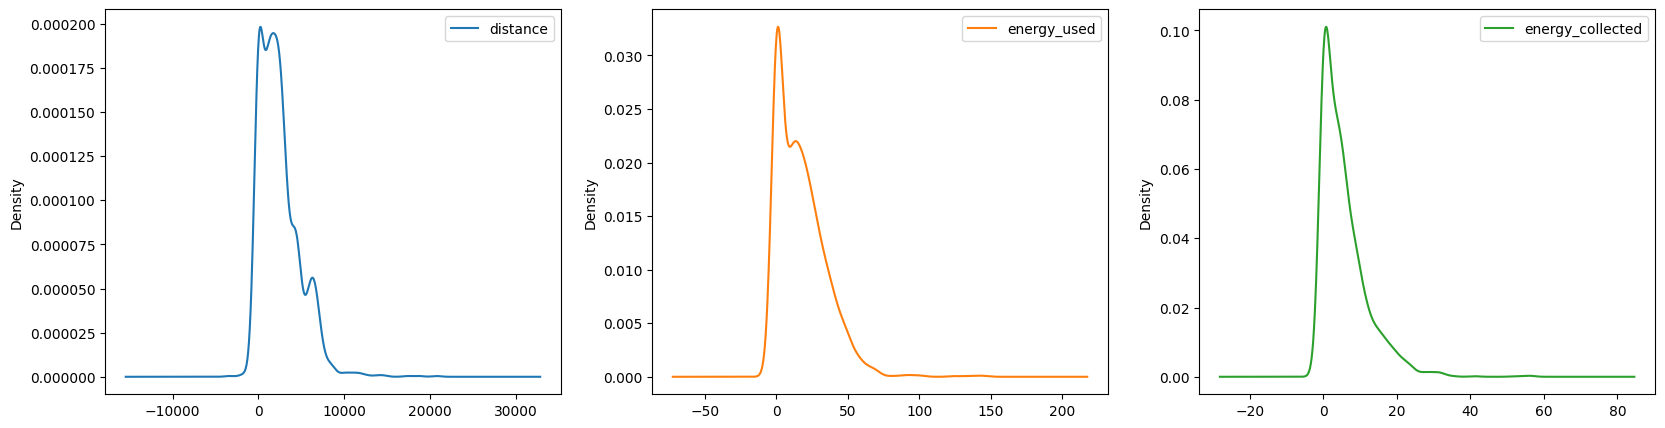

In [ ]:
df[["distance","energy_used","energy_collected"]].plot(kind = "density", figsize = (20,5), sharex = False, subplots = True, layout=(1,3))


### The curves are not bell_shaped. "distance", "energy_used" and "energy_collected" do not follow normal distribution.

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

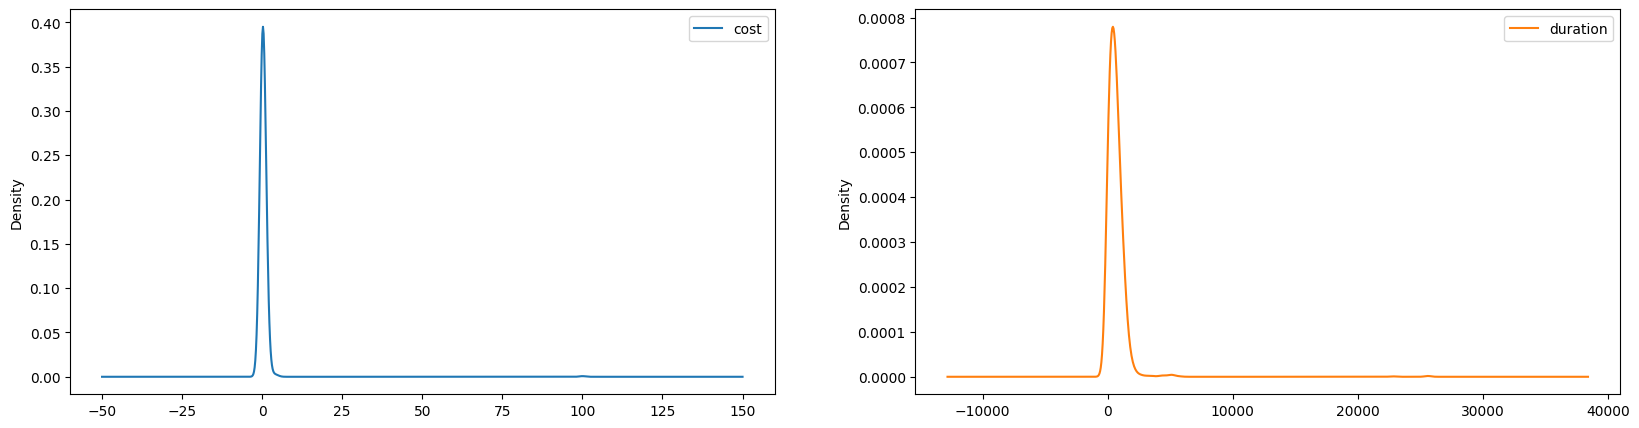

In [ ]:
df[["cost","duration"]].plot(kind = "density",figsize = (20,5), sharex = False, subplots = True, layout = (1,2) )

The above curves are not bell-shaped. Therefore, these variables do not follow normal distribution.

### Plotting Box Plots

###Plottting box plots of Numerical Variables

### Plotting box plot of cost

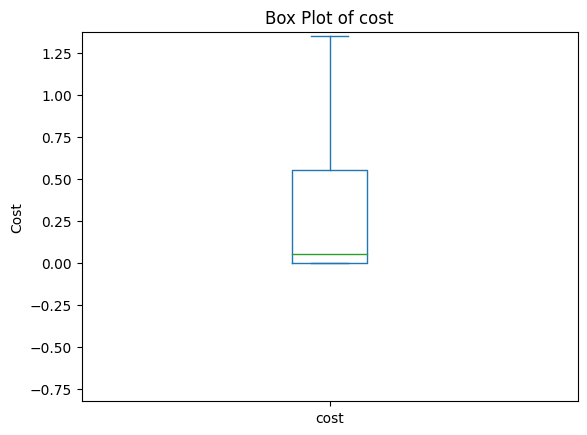

In [ ]:
# Calculating Q1, Q3, and IQR
Q1 = df['cost'].quantile(0.25)
Q3 = df['cost'].quantile(0.75)
IQR = Q3 - Q1

# Setting  y-limits based on quartiles and whiskers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Creating the box plot with specified y-limits
ax = df.cost.plot.box(title="Box Plot of cost", ylabel="Cost")
ax.set_ylim(lower_limit, upper_limit)
plt.show()


Plotting Box Plot of energy_collected

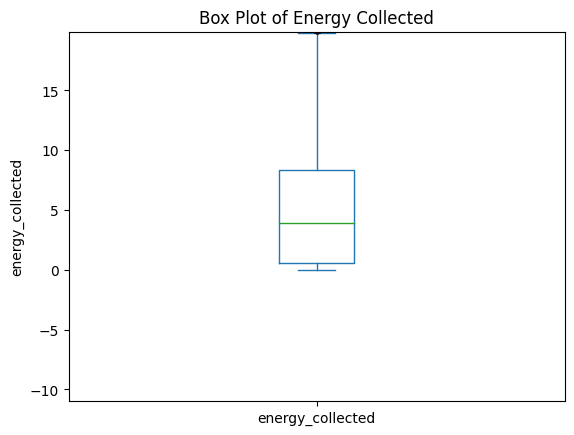

In [ ]:
# Calculating Q1, Q3, and IQR
Q1 = df['energy_collected'].quantile(0.25)
Q3 = df['energy_collected'].quantile(0.75)
IQR = Q3 - Q1

# Setting y-limits based on quartiles and whiskers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Creating the box plot with specified y-limits
ax = df.energy_collected.plot.box(title="Box Plot of Energy Collected", ylabel="energy_collected")
ax.set_ylim(lower_limit, upper_limit)
plt.show()


#### Plotting box plot of energy_used

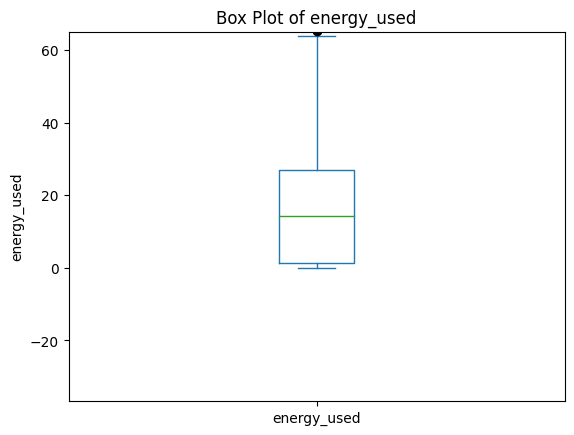

In [ ]:
# Calculate Q1, Q3, and IQR
Q1 = df['energy_used'].quantile(0.25)
Q3 = df['energy_used'].quantile(0.75)
IQR = Q3 - Q1

# Set y-limits based on quartiles and whiskers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Create the box plot with specified y-limits
ax = df.energy_used.plot.box(title="Box Plot of energy_used", ylabel="energy_used")
ax.set_ylim(lower_limit, upper_limit)
plt.show()


### Plotting Box Plot of distance

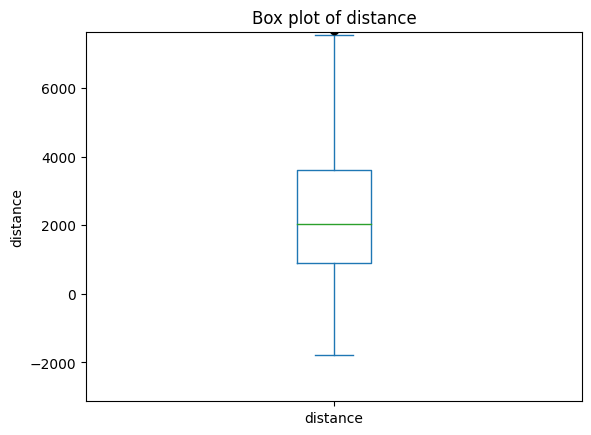

In [ ]:
# Calculating Q1, Q3, and IQR
Q1 = df['distance'].quantile(0.25)
Q3 = df['distance'].quantile(0.75)
IQR = Q3 - Q1

# Setting y-limits based on quartiles and whiskers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Creating the box plot with specified y-limits
box_plt = df.distance.plot.box(title="Box plot of distance", ylabel="distance")
box_plt.set_ylim(lower_limit, upper_limit)
plt.show()


### Box plot of duration

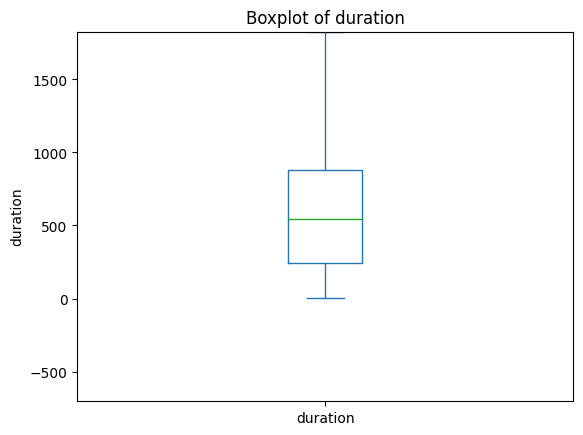

In [ ]:
# Calculating Q1, Q3, and IQR
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1

# Setting y-limits based on quartiles and whiskers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Creating the box plot with specified y-limits
box_plt = df.duration.plot.box(title="Boxplot of duration", ylabel="duration")
box_plt.set_ylim(lower_limit, upper_limit)
plt.show()

array([[<Axes: xlabel='cost', ylabel='cost'>,
        <Axes: xlabel='duration', ylabel='cost'>,
        <Axes: xlabel='distance', ylabel='cost'>,
        <Axes: xlabel='energy_used', ylabel='cost'>,
        <Axes: xlabel='energy_collected', ylabel='cost'>],
       [<Axes: xlabel='cost', ylabel='duration'>,
        <Axes: xlabel='duration', ylabel='duration'>,
        <Axes: xlabel='distance', ylabel='duration'>,
        <Axes: xlabel='energy_used', ylabel='duration'>,
        <Axes: xlabel='energy_collected', ylabel='duration'>],
       [<Axes: xlabel='cost', ylabel='distance'>,
        <Axes: xlabel='duration', ylabel='distance'>,
        <Axes: xlabel='distance', ylabel='distance'>,
        <Axes: xlabel='energy_used', ylabel='distance'>,
        <Axes: xlabel='energy_collected', ylabel='distance'>],
       [<Axes: xlabel='cost', ylabel='energy_used'>,
        <Axes: xlabel='duration', ylabel='energy_used'>,
        <Axes: xlabel='distance', ylabel='energy_used'>,
        <Axes: xlab

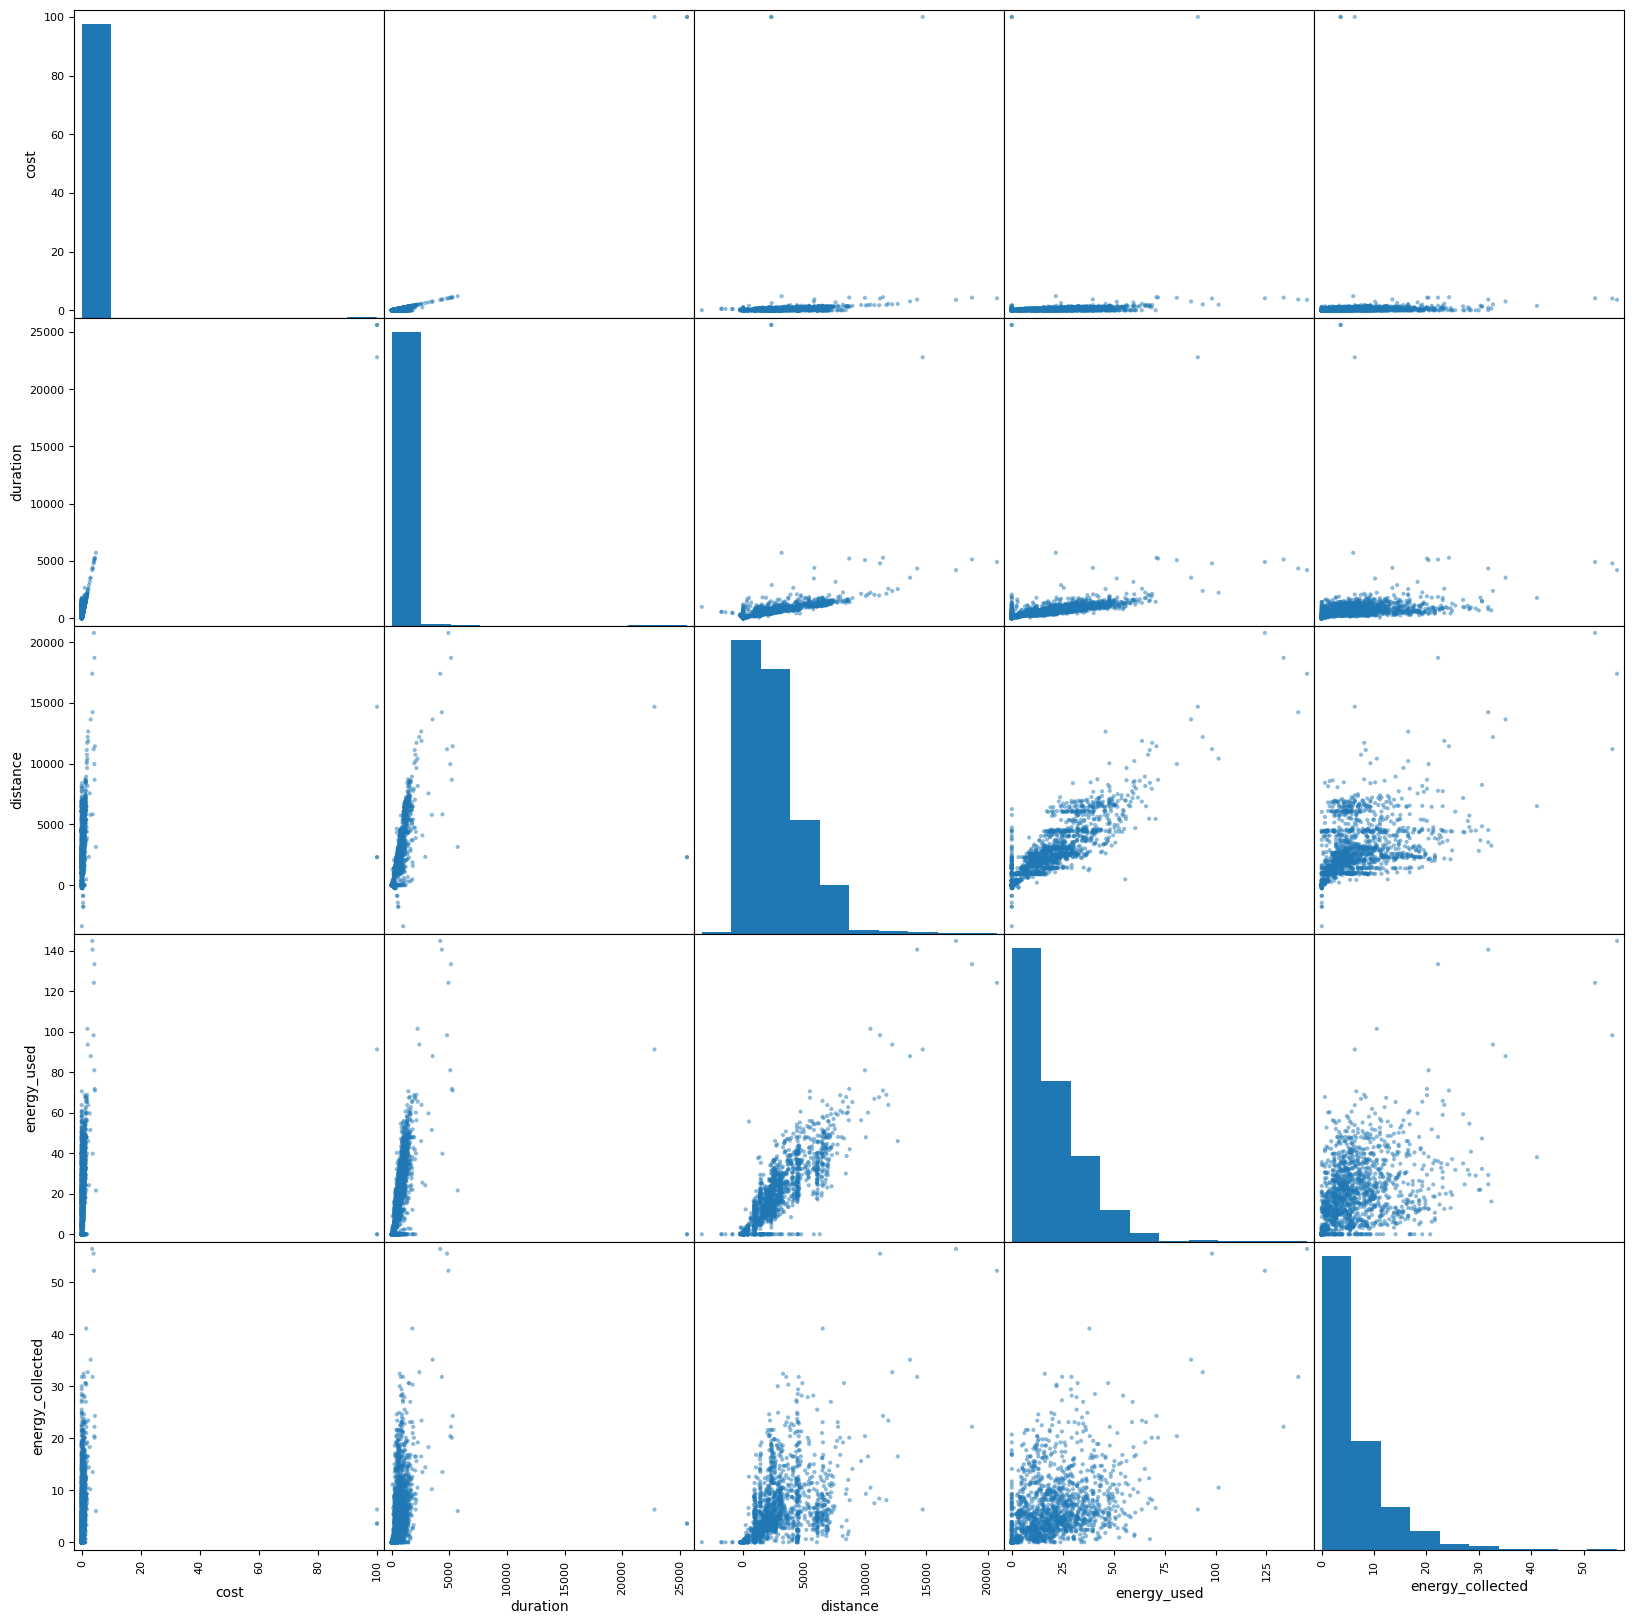

In [ ]:
scatter_matrix(df,figsize = (20,20),diagonal = "hist") # creating a scatter matrix


## pair plots: Pair plot of variables is plotted to explore the relationships among the variables.

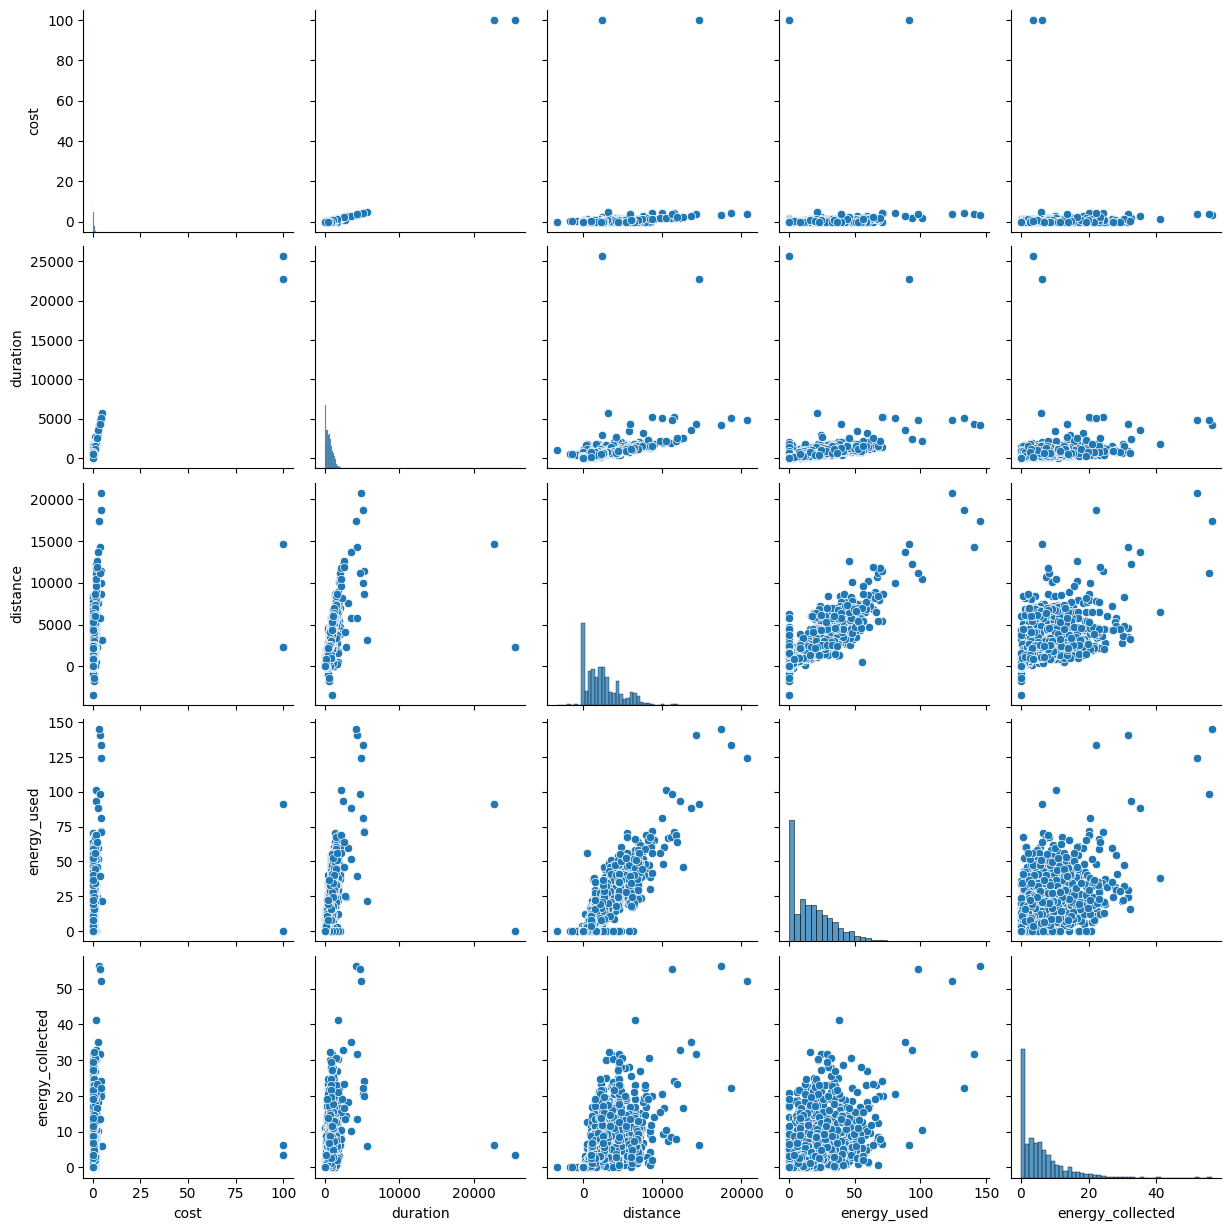

In [ ]:
import seaborn as sns # importing sns library
sns.pairplot(df) ### creating pairplots of numerical variables
plt.show()

The provided plot reveals significant positive correlations among the variables: distance, duration, energy_used, and energy_collected.

1. **Distance and Duration**: There is a positive correlation between distance and duration, indicating that as the distance traveled increases, the duration of the trip also increases proportionally.

2. **Duration and Energy Used**: A positive correlation between duration and energy_used implies that longer travel durations are associated with higher energy consumption by the electric bike.

3. **Duration and Energy Collected**: The positive correlation between duration and energy_collected suggests that trips of longer durations result in greater energy collection by the electric bike.

4. **Cost and Duration**: The positive correlation between cost and duration indicates that as the travel duration increases, the overall cost of the trip also rises accordingly.

5. **Cost and Distance**: There exists a positive correlation between cost and distance, implying that trips covering greater distances tend to incur higher costs.

6. **Energy Used and Distance**: The positive correlation between energy_used and distance signifies that trips covering larger distances require more energy consumption by the electric bike.

7. **Energy Used and Energy Collected**: There is a positive correlation between energy_used and energy_collected, indicating that as the bike consumes more energy, it also collects more energy.

8. **Energy Collected and Distance**: The positive correlation between energy_collected and distance suggests that trips covering larger distances result in the collection of more energy by the electric bike.

Overall, these correlations highlight the intricate relationships among the variables, demonstrating the interconnected nature of factors influencing the travel experience of electric bike riders.

### Numerical Summaries of the variables:-

In [ ]:
df.index # checking the number of indices

RangeIndex(start=0, stop=1774, step=1)

In [ ]:
df.dtypes ###checking the data types of columns

ticket              category
cost                 float64
month               category
location_from       category
location_to         category
duration             float64
distance               int64
assistance          category
energy_used          float64
energy_collected     float64
dtype: object

In [ ]:
df.dtypes.value_counts() ### counting the columns for each datatype

float64     4
category    2
category    1
category    1
int64       1
category    1
dtype: int64

In [ ]:
# commonly used statistics for all variables
# different statistics for categorical and quantitative variables

df.describe(include = "all")

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected
count,1774,1774.000000,1774,1774,1774,1774.000000,1774.000000,1774,1774.000000,1774.000000
unique,3,NaN,7,10,10,NaN,NaN,2,NaN,NaN
top,single,NaN,June,TORI,TORI,NaN,NaN,enabled,NaN,NaN
freq,967,NaN,355,418,400,NaN,NaN,1625,NaN,NaN
mean,NaN,0.491234,NaN,NaN,NaN,671.323563,2460.067644,NaN,17.399493,5.639290
std,NaN,4.127344,NaN,NaN,NaN,1141.708627,2352.529305,NaN,17.194463,6.379593
min,NaN,0.000000,NaN,NaN,NaN,2.000000,-3380.000000,NaN,0.000000,0.000000
25%,NaN,0.000000,NaN,NaN,NaN,245.250000,910.000000,NaN,1.425000,0.600000
50%,NaN,0.050000,NaN,NaN,NaN,546.500000,2030.000000,NaN,14.350000,3.900000
75%,NaN,0.550000,NaN,NaN,NaN,877.750000,3605.000000,NaN,26.900000,8.325000


In [ ]:
data_energy_collected = df["energy_collected"]
data_energy_used = df["energy_used"]
data_distance = df["distance"]
data_cost = df["cost"]
data_duration = df["duration"]

In [ ]:
### performing Shapiro- Wilk tests for determining normality of the numerical variables

(stat1,p1)=shapiro(data_energy_collected)
(stat2,p2) = shapiro(data_energy_used)
(stat3,p3) = shapiro(data_distance)
(stat4,p4) = shapiro(data_cost)
(stat5,p5) = shapiro(data_duration)

In [ ]:
print(p1,p2,p3,p4,p5)


6.679989779436403e-42 1.2492422899767317e-36 2.1559788954123356e-35 0.0 0.0


The p-values of cost,duration,distance, energy_used and energy_collected  are less that 0.05. Therefore, they do not follow normal distribution.

### Getting Basic Descriptive Statistics of the  Variables of  the Given Dataframe:

In [ ]:
df.describe(include = "all") ### describe() is called to provide a brief overview of the numerical variables in a datframe

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected
count,1774,1774.000000,1774,1774,1774,1774.000000,1774.000000,1774,1774.000000,1774.000000
unique,3,NaN,7,10,10,NaN,NaN,2,NaN,NaN
top,single,NaN,June,TORI,TORI,NaN,NaN,enabled,NaN,NaN
freq,967,NaN,355,418,400,NaN,NaN,1625,NaN,NaN
mean,NaN,0.491234,NaN,NaN,NaN,671.323563,2460.067644,NaN,17.399493,5.639290
std,NaN,4.127344,NaN,NaN,NaN,1141.708627,2352.529305,NaN,17.194463,6.379593
min,NaN,0.000000,NaN,NaN,NaN,2.000000,-3380.000000,NaN,0.000000,0.000000
25%,NaN,0.000000,NaN,NaN,NaN,245.250000,910.000000,NaN,1.425000,0.600000
50%,NaN,0.050000,NaN,NaN,NaN,546.500000,2030.000000,NaN,14.350000,3.900000
75%,NaN,0.550000,NaN,NaN,NaN,877.750000,3605.000000,NaN,26.900000,8.325000


The brief descriptive statistics of the variables or columns of the electrical bikes dataset are given below:-

## cost:

Count: 1774. There are 1774 data points.

Mean: 0.491234 euros, indicating the average cost.

Standard Deviation (Std): 4.127344 euros, It shows the spread of cost values around the mean which is 0.491.

Minimum: 0.000000 euros, the lowest cost observed in the dataset is 0.

25th Percentile (Q1): 0.000000 euros, It means 25% of the data have a cost lower than or equal to 0.

Median (50th Percentile or Q2): 0.050000 euros, The the middle value of the cost is 0.05.

75th Percentile (Q3): 0.550000 euros, It means 75% of the data have a cost lower than or equal to 0.55 euros.

Maximum: 100.000000,The highest cost observed is 100 euros.

## month:

Min: 4.000000, the earliest month observed.Therefore, the data contains the trips made from April.

Q1: 6.000000, the 25th percentile month is June. So, 25% of the trips are made before June.

Q2: 7.000000, the median month is July. The  half of the trips are made before July.

Q3: 9.000000, the 75th percentile month is September. The 75% of the trips are made before September.

Max: 10.000000, The latest month observed is October.


## duration:

Mean: 671.323563 s. The average time duration of all the trips is 671.32 s.

Std: 1141.708627 s, the spread of duration values around the mean duration.

Min: 2.000000 s, the shortest travel duration observed is 2 seconds.

Q1: 245.250000 s, It means the 25% of the trips have duration less than or equal to 245.25 s.

Q2: 546.500000 s, the median duration.

Q3: 877.750000 s, the 75th percentile duration. it means 75% of the trips have duration less that or equal to 877.75

Max: 25614.000000 s, the longest travel duration observed.


## distance:

Mean: 2460.067644 meters, the average distance covered is 2460.067644 meters.

Std: 2352.529305 meters, the spread of distance values around the mean.

Min: -3380.000000 meters, the minimum distance observed is -3380 (a negative value might indicate data quality issues).

Q1: 910.000000 meters, the 25th percentile distance. In 25% of cases, the distance covered by the trips is 910.

Q2: 2030.000000 meters, the median distance.

Q3: 3605.000000 meters, the 75th percentile distance. It means 75% of the trips have distance less that or equal to it.

Max: 20770.000000 meters, the maximum distance observed.




## energy_used:

Mean: 17.399493

The mean (average) energy used is approximately 17.4 Wh.

Std: 17.194463

The standard deviation is approximately 17.2 Wh. This value represents how spread out the energy usage values are around the mean. In this case, the energy usage values vary around 17.4 Wh on average by about 17.2 WH.

Min: 0.000000

The minimum energy used is 0 Wh. In some cases, no energy was consumed.

Q1: 1.425000

The 25th percentile energy usage is 1.425 WH. This means that 25% of the cases have energy usage at or below this value.

Q2: 14.350000

The median (Q2) energy usage is 14.35 Wh. Half of the cases have energy usage at or below this value. It represents the middle point of the data set when arranged in ascending order.

Q3: 26.900000

The 75th percentile energy usage is 26.9 Wh. This means that 75% of the cases have energy usage at or below this value.

Max: 144.900000

The maximum energy used is 144.9 WH. This represents the highest energy usage recorded in the cases under consideration.


## energy_collected:

Mean: 5.639290

On average, the energy collected is approximately 5.64 Wh. This is the average amount of energy collected across the cases studied.

Std: 6.379593

The energy collection values vary around the average (5.64 WH) by about 6.38 Wh on average. This standard deviation represents the dispersion of the energy collected values.

Min: 0.000000

The minimum energy collected is 0 Wh. In some cases, no energy was collected, indicating the no usage of regenerative breaking systems.

Q1: 0.600000

At the 25th percentile, the energy collected is 0.6 Wh or higher. This means that 25% of the cases collected this amount of energy or less.

Q2: 3.900000

The median (Q2) energy collected is 3.9 Wh. This represents that half of the trips collected 3.9 units of energy or less.

Q3: 8.325000

At the 75th percentile, the energy collected is 8.325 Wh or lower. Thus, 75% of the trips collected this amount of energy or less, showing a substantial increase from the median.

Max: 56.400000

The maximum energy collected is 56.4 WH. This represents the highest amount of energy collected among the trips studied.

### From the above descriptive statistics, we got that the variables cost,duration, distance, energy_used, energy_collected are numerical variables because they represent  numerical values for representing measurable quantities.

### The variables location_to, location_from, assistance, month and ticket are categorical variables as they represent specific categories.

### location_to is a categorical variable that represents the end location of a trip which cannot be measured.

### location_from is also a categorical variable that represents the start location of a trip that cannot be measured.


### As assistance variable represents 0 or 1 in particular groups or categories of disabled and enabled, it is a categorical variable.


### ticket is also a categorical variable because it represents types of tickets.

### In this dataset, month could be considered as a categorical variable as it represents the calendar months of trips as numerical discrete values which are fixed.




###**Data Cleaning**

### Checking the Presence of Null Values:

In [ ]:
 ### Checking the presence of null values by calling isnull() that returns a dataframe object.
### In that dataframe object, True represents null values and False represents non-null values.

df.isnull()

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1769,False,False,False,False,False,False,False,False,False,False
1770,False,False,False,False,False,False,False,False,False,False
1771,False,False,False,False,False,False,False,False,False,False
1772,False,False,False,False,False,False,False,False,False,False


In [ ]:
### calculating the null values  for  each variable in the dataframe

df.isnull().sum()

ticket              0
cost                0
month               0
location_from       0
location_to         0
duration            0
distance            0
assistance          0
energy_used         0
energy_collected    0
dtype: int64

### There is no missing value in the dataset as the sum is 0 for all columns of the dataset.

### **Cleaning Irrelevant or Invalid values from the dataset:-**

###  Filtering the dataset and discarding the irrelevants observations of cancelled trips:
The maintenance team has reported several technical issues with the bikes, potentially leading to invalid values in the dataset, including cost, distance, and energy_used variables. To ensure accurate statistical analysis, it is imperative to filter and clean the dataset, removing these invalid values.

###Checking irrelevant values

The invalid and irrelevant values of the given dataset are the negative and zero values of distance, zero values of cost and energy_used variables.

In [ ]:
df_02 = df[df["distance"]<0]

In [ ]:
### filter condition for determining irrelevant values for cancelled trips
filt0 = ((df["distance"]==0) | (df["distance"]<0) | (df["cost"]==0)|(df["energy_used"]==0))

In [ ]:
df_irrelevant = df[filt0] ### printing the irrelevant values

In [ ]:
df_irrelevant ### printing the irrelevant values of the given dataframe

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected
2,savonia,0.0,September,TASAVALLANKATU,NEULAMÄKI,1308.0,5420,enabled,43.0,9.9
3,savonia,0.0,October,TORI,KAUPPAKATU,1036.0,1180,enabled,6.5,2.1
8,season,0.0,June,NEULAMÄKI,TORI,797.0,4490,enabled,25.4,12.0
9,savonia,0.0,September,TORI,TORI,5.0,0,disabled,0.0,0.0
10,savonia,0.0,October,TORI,MICROTEKNIA,643.0,3060,enabled,23.1,6.6
...,...,...,...,...,...,...,...,...,...,...
1766,season,0.0,June,MICROTEKNIA,MICROTEKNIA,19.0,10,enabled,0.1,0.0
1769,savonia,0.0,October,KAUPPAKATU,TORI,836.0,960,enabled,8.0,2.7
1771,season,0.0,July,TORI,TORI,61.0,0,enabled,0.0,0.0
1772,savonia,0.0,September,MICROTEKNIA,PUIJONLAAKSO,610.0,2460,enabled,36.5,6.9


In [ ]:
df_irrelevant.shape # printing the shape of the dataframe

(1020, 10)

### Exploring Cost Variable

In [ ]:

###printing cost for those observations where it is 0
df[df["cost"]== 0]


,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected
2,savonia,0.0,September,TASAVALLANKATU,NEULAMÄKI,1308.0,5420,enabled,43.0,9.9
3,savonia,0.0,October,TORI,KAUPPAKATU,1036.0,1180,enabled,6.5,2.1
8,season,0.0,June,NEULAMÄKI,TORI,797.0,4490,enabled,25.4,12.0
9,savonia,0.0,September,TORI,TORI,5.0,0,disabled,0.0,0.0
10,savonia,0.0,October,TORI,MICROTEKNIA,643.0,3060,enabled,23.1,6.6
...,...,...,...,...,...,...,...,...,...,...
1766,season,0.0,June,MICROTEKNIA,MICROTEKNIA,19.0,10,enabled,0.1,0.0
1769,savonia,0.0,October,KAUPPAKATU,TORI,836.0,960,enabled,8.0,2.7
1771,season,0.0,July,TORI,TORI,61.0,0,enabled,0.0,0.0
1772,savonia,0.0,September,MICROTEKNIA,PUIJONLAAKSO,610.0,2460,enabled,36.5,6.9


There are 683 rows where cost= 0

# Filtering Cost Variable

In [ ]:
### Identifying the rows where cost>0:

filt_4 = (df["cost"]>0)

### determining median of the positive values of the cost variable

median_cost = df.loc[filt_4,"cost"].median()

### filtering the rows where cost==0

filt_9 = (df["cost"]==0)

### Imputing median

df.loc[filt_9,"cost"] = median_cost

In [ ]:
df

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected
0,single,0.35,September,MICROTEKNIA,PUIJONLAAKSO,411.0,2150,enabled,19.0,2.7
1,single,1.20,May,SATAMA,KEILANKANTA,1411.0,7130,enabled,53.8,15.3
2,savonia,0.50,September,TASAVALLANKATU,NEULAMÄKI,1308.0,5420,enabled,43.0,9.9
3,savonia,0.50,October,TORI,KAUPPAKATU,1036.0,1180,enabled,6.5,2.1
4,single,0.30,September,TORI,TORI,319.0,1120,enabled,13.7,1.2
...,...,...,...,...,...,...,...,...,...,...
1769,savonia,0.50,October,KAUPPAKATU,TORI,836.0,960,enabled,8.0,2.7
1770,single,0.20,July,TORI,SATAMA,199.0,930,enabled,3.7,3.6
1771,season,0.50,July,TORI,TORI,61.0,0,enabled,0.0,0.0
1772,savonia,0.50,September,MICROTEKNIA,PUIJONLAAKSO,610.0,2460,enabled,36.5,6.9


# Dropping the irrelevant observations

### The dataset has irrelevant values for those cases in which the customers cancelled the trip because of trying out the app. In those observations, the distance, energy_collected, energy_used could  be 0. If distance = 0, energy_collected = 0 and energy_used = 0 for a bike, then the bike was not being used during trips.

### Even those observations might also occur due to some technical issues.But it could be observed that in those cases the duration is not zero because the users  could have activated the bike rental process, which set the timer and ended in the non-zero duration.

In [ ]:
### dropping the rows that contain the irrelevant values

df.drop(df[(df["distance"]==0) & (df["energy_used"]==0)& (df["energy_collected"]==0)].index, inplace = True)

In [ ]:
df ### displaying the dataframe after discarding the observations that might include cancelled trips

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected
0,single,0.35,September,MICROTEKNIA,PUIJONLAAKSO,411.0,2150,enabled,19.0,2.7
1,single,1.20,May,SATAMA,KEILANKANTA,1411.0,7130,enabled,53.8,15.3
2,savonia,0.50,September,TASAVALLANKATU,NEULAMÄKI,1308.0,5420,enabled,43.0,9.9
3,savonia,0.50,October,TORI,KAUPPAKATU,1036.0,1180,enabled,6.5,2.1
4,single,0.30,September,TORI,TORI,319.0,1120,enabled,13.7,1.2
...,...,...,...,...,...,...,...,...,...,...
1768,single,1.00,July,KEILANKANTA,KAUPPAKATU,1167.0,6070,enabled,34.3,3.0
1769,savonia,0.50,October,KAUPPAKATU,TORI,836.0,960,enabled,8.0,2.7
1770,single,0.20,July,TORI,SATAMA,199.0,930,enabled,3.7,3.6
1772,savonia,0.50,September,MICROTEKNIA,PUIJONLAAKSO,610.0,2460,enabled,36.5,6.9


In [ ]:
df.shape # printing shape of the dataframe

(1517, 10)

### After discarding the irrelevant rows of possible cancelled trips, the dataset contains 1517 rows. In the previous dataset, there were 1774 observations. Therefore, the cleaned dataset contains (1517/1774) X 100 % or 85.52 % data of previous dataset.   Therefore, the remaining 1517 observations are still good enough for accurate statistical analysis.

# Exploring & Filtering distance variable

In [ ]:
df[df["distance"]<0] ###printing rows for negative distances

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected
23,single,0.15,May,TASAVALLANKATU,TASAVALLANKATU,138.0,-150,enabled,0.2,0.0
60,season,0.50,August,MICROTEKNIA,MICROTEKNIA,41.0,-20,enabled,0.0,0.0
62,single,0.10,August,KEILANKANTA,KEILANKANTA,73.0,-30,enabled,0.0,0.0
96,single,0.05,May,TORI,TORI,48.0,-10,enabled,0.0,0.0
125,savonia,0.50,October,KAUPPAKATU,KAUPPAKATU,48.0,-20,enabled,0.0,0.0
242,savonia,0.50,October,TORI,KAUPPAKATU,207.0,-180,enabled,3.3,0.0
284,single,0.15,April,KAUPPAKATU,KAUPPAKATU,178.0,-50,enabled,0.2,0.0
295,season,0.50,August,KAUPPAKATU,KAUPPAKATU,79.0,-60,enabled,0.0,0.0
318,single,0.45,August,KYS,PUIJONLAAKSO,480.0,-880,enabled,0.0,0.0
322,savonia,0.50,October,KYS,KYS,70.0,-10,enabled,0.0,0.0


There are several observations with negative distance.

In [ ]:
df[df["distance"]==0] ###checking if distance==0 value

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected


There is no observation with distance = 0 value in the dataset.

In [ ]:
df.describe()

,cost,duration,distance,energy_used,energy_collected
count,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000
mean,0.790639,769.986816,2876.835860,20.347198,6.594661
std,4.437335,1205.442101,2296.268283,16.904214,6.426059
min,0.050000,8.000000,-3380.000000,0.000000,0.000000
25%,0.500000,364.000000,1390.000000,8.100000,2.400000
50%,0.500000,622.000000,2350.000000,17.700000,5.100000
75%,0.600000,954.000000,4140.000000,29.400000,9.000000
max,100.000000,25614.000000,20770.000000,144.900000,56.400000


From the above descriptive statistics, it could be noted that the minimum value for distance is negative which is invalid. Moreover, the minimum values for energy_used and cost are 0. We need to filter those values.


In [ ]:
df

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected
0,single,0.35,September,MICROTEKNIA,PUIJONLAAKSO,411.0,2150,enabled,19.0,2.7
1,single,1.20,May,SATAMA,KEILANKANTA,1411.0,7130,enabled,53.8,15.3
2,savonia,0.50,September,TASAVALLANKATU,NEULAMÄKI,1308.0,5420,enabled,43.0,9.9
3,savonia,0.50,October,TORI,KAUPPAKATU,1036.0,1180,enabled,6.5,2.1
4,single,0.30,September,TORI,TORI,319.0,1120,enabled,13.7,1.2
...,...,...,...,...,...,...,...,...,...,...
1768,single,1.00,July,KEILANKANTA,KAUPPAKATU,1167.0,6070,enabled,34.3,3.0
1769,savonia,0.50,October,KAUPPAKATU,TORI,836.0,960,enabled,8.0,2.7
1770,single,0.20,July,TORI,SATAMA,199.0,930,enabled,3.7,3.6
1772,savonia,0.50,September,MICROTEKNIA,PUIJONLAAKSO,610.0,2460,enabled,36.5,6.9


**Filtering the invalid and irrelevant values with Median imputation:**

The invalid and irrelevant values of "cost", "distance","energy_used", should be replaced with medians of their respective columns as these variables are not normally distributed. These irrelevant and invalid values would be replaced with medians because median represents the central tendency well even if the data is not normally distributed.

### Replacing negative distances with median imputation

In [ ]:
filt = df["distance"]>=0 ### condition for considering positive values

### calculating median of distance column by considering the positive values
dist_median = df[filt]["distance"].median()

### Replacing negative values with the calculated median value
df["distance"] = df["distance"].apply(lambda a: dist_median if a<0 else a)


# Energy Collection of Electric Bikes:

Energy collection of an electric bike refers to the regenerative braking capabilites of that bike. If regenerative braking is enabled, then electric motor of that bike works as a generator while brake is applied by the rider. In this case, kinetic energy is transformed into electrical energy. So, "energy_collected" will increase when regenerative braking is applied.

When the electric bike does not have regenerative braking capabilities, then the kinetic energy of that bike will be lost as heat when traditional brake will be applied. So, no energy will be collected in that bike. In this case, "energy_collected = 0."

So, energy_collected variable depends on the regenerative braking capabilities of a bike. It does not depend on electric assistance feature of that bike.


But, there is no information given on regenerative braking capabilities of the electric bikes in my dataset. Moreover, I do not know for which observations energy_collected = 0 value resulted from technical errors with the bikes.

Therefore, I would not apply filtering or cleaning methods on energy_collected variable in cases where energy_collected = 0 as zero values of energy_collected variable cannot be considered as invalid values with surity.

I am preserving the original values of energy_collected variables for transparency and preventing data loss for maintaining the data quality.If I replace those zero values of energy_collected variable, then it might generate biases in the dataset.


### Exploring energy_collected variable

In [ ]:
### how many values of energy_collected variable are 0

df[df["energy_collected"]== 0]



,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected
5,single,1.00,June,NEULAMÄKI,TORI,1185.0,3280.0,enabled,21.2,0.0
23,single,0.15,May,TASAVALLANKATU,TASAVALLANKATU,138.0,2410.0,enabled,0.2,0.0
33,single,0.15,July,TORI,KAUPPAKATU,131.0,400.0,enabled,2.1,0.0
43,single,0.20,July,KEILANKANTA,KEILANKANTA,185.0,100.0,disabled,0.0,0.0
60,season,0.50,August,MICROTEKNIA,MICROTEKNIA,41.0,2410.0,enabled,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1725,single,0.40,July,TASAVALLANKATU,KAUPPAKATU,445.0,1620.0,enabled,13.1,0.0
1740,single,0.10,June,TASAVALLANKATU,TASAVALLANKATU,84.0,50.0,enabled,0.0,0.0
1747,season,0.50,June,NEULAMÄKI,NEULAMÄKI,111.0,10.0,enabled,0.0,0.0
1755,season,0.50,September,TORI,KAUPPAKATU,113.0,390.0,enabled,3.1,0.0


### In the dataset, there are 127 rows where energy_collected = 0.But, there is no information given on regenerative braking capabilities of the electric bikes in my dataset. Therefore, I would not apply filtering or cleaning methods on energy_collected variable as these values are valid.

# Exploring & Filtering energy_used Variable:

Energy_used variable refers to the amount of energy utilized by the motor to assist the user.

If electric assistance is enabled and  electric bike is in motion, then energy_used for that bike must be greater than zero as the electric motor is utilizing energy while assisting the rider .

If electric assistance is disabled, then the energy_used variable must be close or equal to zero as the electric motor is deactivated while rider is riding the electric bike.

In [ ]:
### printing the rows where energy_used == 0

df[df["energy_used"] == 0]

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected
43,single,0.20,July,KEILANKANTA,KEILANKANTA,185.0,100.0,disabled,0.0,0.0
51,single,1.45,May,KAUPPAKATU,SATAMA,1722.0,6270.0,disabled,0.0,8.4
60,season,0.50,August,MICROTEKNIA,MICROTEKNIA,41.0,2410.0,enabled,0.0,0.0
62,single,0.10,August,KEILANKANTA,KEILANKANTA,73.0,2410.0,enabled,0.0,0.0
67,savonia,0.50,October,PUIJONLAAKSO,MICROTEKNIA,517.0,2280.0,disabled,0.0,14.1
...,...,...,...,...,...,...,...,...,...,...
1709,single,0.55,April,TASAVALLANKATU,KAUPPAKATU,633.0,1610.0,enabled,0.0,3.3
1736,single,0.15,July,TORI,KAUPPAKATU,132.0,390.0,disabled,0.0,0.9
1740,single,0.10,June,TASAVALLANKATU,TASAVALLANKATU,84.0,50.0,enabled,0.0,0.0
1747,season,0.50,June,NEULAMÄKI,NEULAMÄKI,111.0,10.0,enabled,0.0,0.0


In [ ]:
### checking observations where assistance is enabled and energy_used = 0

df[(df["assistance"]== "enabled") & (df["energy_used"]==0) ]

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected
60,season,0.50,August,MICROTEKNIA,MICROTEKNIA,41.0,2410.0,enabled,0.0,0.0
62,single,0.10,August,KEILANKANTA,KEILANKANTA,73.0,2410.0,enabled,0.0,0.0
96,single,0.05,May,TORI,TORI,48.0,2410.0,enabled,0.0,0.0
125,savonia,0.50,October,KAUPPAKATU,KAUPPAKATU,48.0,2410.0,enabled,0.0,0.0
193,single,0.10,July,NEULAMÄKI,NEULAMÄKI,101.0,10.0,enabled,0.0,0.0
254,single,0.10,July,PUIJONLAAKSO,PUIJONLAAKSO,66.0,30.0,enabled,0.0,0.0
295,season,0.50,August,KAUPPAKATU,KAUPPAKATU,79.0,2410.0,enabled,0.0,0.0
318,single,0.45,August,KYS,PUIJONLAAKSO,480.0,2410.0,enabled,0.0,0.0
321,savonia,0.50,September,TORI,TORI,112.0,130.0,enabled,0.0,0.0
322,savonia,0.50,October,KYS,KYS,70.0,2410.0,enabled,0.0,0.0


Upon executing the code, it became evident that certain observations in the dataset exhibited energy_used values of 0, despite the electric bike being in motion (as indicated by distance > 0) and electric_assistance being "enabled". This scenario is inconsistent, as energy_used should not be zero when the bike is in motion and electric_assistance is enabled. Consequently, these specific data points require cleaning to maintain the integrity of the dataset for further analysis in accordance with established data science practices.

In [ ]:
###checking observations where df["assistance"]=="disabled" and energy_used does not equal 0

df[(df["assistance"] == "disabled" ) & (df["energy_used"]!=0)]

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected
231,single,0.10,July,TASAVALLANKATU,TASAVALLANKATU,61.0,1300.0,disabled,9.0,11.1
611,season,0.50,October,PIRTTI,PIRTTI,1795.0,1880.0,disabled,12.1,2.7
1372,savonia,0.50,October,TORI,TORI,8.0,190.0,disabled,1.5,0.6
1453,single,0.55,July,TORI,PUIJONLAAKSO,611.0,2590.0,disabled,25.4,3.3


In the dataset, certain observations indicate energy_used values greater than 1 when electric assistance is "disabled". These values are considerably larger than zero and appear to be inconsistent. Hence, it is necessary to clean these observations to maintain data integrity.

Additionally, there are observations pertaining to electric bikes where energy_used equals zero despite assistance being "enabled" and the bikes traversing a distance greater than zero. This condition is not consistent with the expected behavior of electric bikes in motion. Consequently, these specific data points also require cleaning to ensure the dataset's accuracy and reliability for rigorous data science analysis.

### Replacing Zero Values of energy_used with Median Imputation When Assistance is Enabled

In [ ]:

 ###filtering condition for identifying rows where "energy_used" = 0 and assistance = "enabled"
filt_1 = ((df["assistance"]=="enabled") & (df["energy_used"]==0))

###filtering condition for calculating median for rows where energy_used > 0 and assistance = "enabled"
filt_2 = ((df["assistance"]=="enabled") & (df["energy_used"]>0))

###calculating median for energy_used when assistance = "enabled" by considering nonzero  of energy_used
energy_used_median = df.loc[filt_2,'energy_used'].median()

 ###median imputation for   energy_used = 0 when assistance = "enabled"
df.loc[filt_1,"energy_used"] = energy_used_median

In [ ]:
df[df["energy_used"]== 0] ###identifying the remaining rows where  energy_used = 0

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected
43,single,0.20,July,KEILANKANTA,KEILANKANTA,185.0,100.0,disabled,0.0,0.0
51,single,1.45,May,KAUPPAKATU,SATAMA,1722.0,6270.0,disabled,0.0,8.4
67,savonia,0.50,October,PUIJONLAAKSO,MICROTEKNIA,517.0,2280.0,disabled,0.0,14.1
91,savonia,0.50,September,TORI,KAUPPAKATU,128.0,380.0,disabled,0.0,0.6
100,savonia,100.00,September,NEULAMÄKI,MICROTEKNIA,25614.0,2310.0,disabled,0.0,3.6
...,...,...,...,...,...,...,...,...,...,...
1675,savonia,0.50,September,KAUPPAKATU,TORI,142.0,350.0,disabled,0.0,0.0
1690,savonia,0.50,October,NEULAMÄKI,MICROTEKNIA,327.0,1420.0,disabled,0.0,1.8
1696,single,0.85,April,NEULAMÄKI,TASAVALLANKATU,960.0,3740.0,disabled,0.0,0.0
1701,savonia,0.50,September,NEULAMÄKI,MICROTEKNIA,339.0,1510.0,disabled,0.0,19.2


The above observations are valid and relevant as the assistance = "disabled" and energy_used = 0.

### Replacing non-zero values of energy_used with 0 for those observations where energy_used != 0 and assistance = "disabled"

In [ ]:
###condition for filtering observations that have non-zero energy_used values and assistance = "disabled"

filt_4 = (df["assistance"]=="disabled") & (df["energy_used"]!= 0)
### Replacing non-zero values of energy_used with 0 when assistance == "disabled"
df.loc[filt_4,"energy_used"] = 0

In [ ]:
df

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected
0,single,0.35,September,MICROTEKNIA,PUIJONLAAKSO,411.0,2150.0,enabled,19.0,2.7
1,single,1.20,May,SATAMA,KEILANKANTA,1411.0,7130.0,enabled,53.8,15.3
2,savonia,0.50,September,TASAVALLANKATU,NEULAMÄKI,1308.0,5420.0,enabled,43.0,9.9
3,savonia,0.50,October,TORI,KAUPPAKATU,1036.0,1180.0,enabled,6.5,2.1
4,single,0.30,September,TORI,TORI,319.0,1120.0,enabled,13.7,1.2
...,...,...,...,...,...,...,...,...,...,...
1768,single,1.00,July,KEILANKANTA,KAUPPAKATU,1167.0,6070.0,enabled,34.3,3.0
1769,savonia,0.50,October,KAUPPAKATU,TORI,836.0,960.0,enabled,8.0,2.7
1770,single,0.20,July,TORI,SATAMA,199.0,930.0,enabled,3.7,3.6
1772,savonia,0.50,September,MICROTEKNIA,PUIJONLAAKSO,610.0,2460.0,enabled,36.5,6.9


In [ ]:
filt_5= (df["distance"] <0) ### checking whether there are negative distance in the dataset after cleaning

In [ ]:
df[filt_5]

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected


The dataset does not contain any irrelevant and invalid records of distances.

In [ ]:
df.describe() ### describing a brief statistics of the dataframe

,cost,duration,distance,energy_used,energy_collected
count,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000
mean,0.790639,769.986816,2947.350033,20.787508,6.594661
std,4.437335,1205.442101,2235.384094,16.618956,6.426059
min,0.050000,8.000000,10.000000,0.000000,0.000000
25%,0.500000,364.000000,1410.000000,9.300000,2.400000
50%,0.500000,622.000000,2410.000000,18.600000,5.100000
75%,0.600000,954.000000,4140.000000,29.400000,9.000000
max,100.000000,25614.000000,20770.000000,144.900000,56.400000


From the above statistics, it could be observed that the minimum values of cost, distance are valid and relevant which are greater than 0.

In [ ]:
df ### printing the final cleaned dataset

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected
0,single,0.35,September,MICROTEKNIA,PUIJONLAAKSO,411.0,2150.0,enabled,19.0,2.7
1,single,1.20,May,SATAMA,KEILANKANTA,1411.0,7130.0,enabled,53.8,15.3
2,savonia,0.50,September,TASAVALLANKATU,NEULAMÄKI,1308.0,5420.0,enabled,43.0,9.9
3,savonia,0.50,October,TORI,KAUPPAKATU,1036.0,1180.0,enabled,6.5,2.1
4,single,0.30,September,TORI,TORI,319.0,1120.0,enabled,13.7,1.2
...,...,...,...,...,...,...,...,...,...,...
1768,single,1.00,July,KEILANKANTA,KAUPPAKATU,1167.0,6070.0,enabled,34.3,3.0
1769,savonia,0.50,October,KAUPPAKATU,TORI,836.0,960.0,enabled,8.0,2.7
1770,single,0.20,July,TORI,SATAMA,199.0,930.0,enabled,3.7,3.6
1772,savonia,0.50,September,MICROTEKNIA,PUIJONLAAKSO,610.0,2460.0,enabled,36.5,6.9


###**Data Exploration**

### With the dataset now cleaned, we conducted exploratory data analysis to gain insights into the relationships between variables. Visualizations such as histograms,and scatter plots were generated to identify patterns and trends within the data.

# 4p) For each ticket type, calculate the number of trips made, the total distance travelled, the total time travelled and the total amount of fees paid. Examine your results and make comments about the customers.



### For each ticket type, calculating the number of trips made, the total distance travelled, the total time travelled and the total amount of fees paid:

For analyzing each ticket type, I need to divide the dataframe into smaller dataframes for each ticket type.

###Splitting the dataframe into smaller dataframes:-

In [ ]:
g_df= df.groupby("ticket") ### separating the dataframe df into different smaller groups of dataframes by ticket types

In [ ]:
g_df

In [ ]:
### iterating through each ticket type and corresponding dataframe in g_df
for ticket, ticket_df in g_df:
  print(ticket)
  print(ticket_df)

savonia
       ticket  cost      month   location_from   location_to  duration  \
2     savonia   0.5  September  TASAVALLANKATU     NEULAMÄKI    1308.0   
3     savonia   0.5    October            TORI    KAUPPAKATU    1036.0   
10    savonia   0.5    October            TORI   MICROTEKNIA     643.0   
17    savonia   0.5  September     MICROTEKNIA   KEILANKANTA    1337.0   
37    savonia   0.5    October     KEILANKANTA        PIRTTI    1161.0   
...       ...   ...        ...             ...           ...       ...   
1750  savonia   0.5    October     KEILANKANTA          TORI    1281.0   
1758  savonia   0.5    October     MICROTEKNIA   MICROTEKNIA     244.0   
1764  savonia   0.5  September     MICROTEKNIA     NEULAMÄKI     421.0   
1769  savonia   0.5    October      KAUPPAKATU          TORI     836.0   
1772  savonia   0.5  September     MICROTEKNIA  PUIJONLAAKSO     610.0   

      distance assistance  energy_used  energy_collected  
2       5420.0    enabled         43.0      

### Getting separate group dataframe

In [ ]:
g_df.get_group("single") # getting the group information for single ticket

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected
0,single,0.35,September,MICROTEKNIA,PUIJONLAAKSO,411.0,2150.0,enabled,19.0,2.7
1,single,1.20,May,SATAMA,KEILANKANTA,1411.0,7130.0,enabled,53.8,15.3
4,single,0.30,September,TORI,TORI,319.0,1120.0,enabled,13.7,1.2
5,single,1.00,June,NEULAMÄKI,TORI,1185.0,3280.0,enabled,21.2,0.0
6,single,0.70,August,KEILANKANTA,TASAVALLANKATU,817.0,4470.0,enabled,27.6,0.6
...,...,...,...,...,...,...,...,...,...,...
1762,single,1.35,July,PIRTTI,TASAVALLANKATU,1597.0,8640.0,enabled,56.3,2.1
1763,single,0.90,September,KAUPPAKATU,KEILANKANTA,1066.0,6130.0,enabled,24.3,4.8
1767,single,3.70,May,TORI,KAUPPAKATU,4400.0,5830.0,enabled,39.8,13.5
1768,single,1.00,July,KEILANKANTA,KAUPPAKATU,1167.0,6070.0,enabled,34.3,3.0


In [ ]:
g_df.get_group("season") # Getting group information for season ticket

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected
8,season,0.5,June,NEULAMÄKI,TORI,797.0,4490.0,enabled,25.4,12.0
11,season,0.5,June,SATAMA,KAUPPAKATU,1014.0,1290.0,enabled,15.6,0.6
12,season,0.5,August,TORI,PUIJONLAAKSO,822.0,2340.0,enabled,31.5,3.6
16,season,0.5,July,NEULAMÄKI,TORI,905.0,4560.0,enabled,24.6,21.3
28,season,0.5,October,TORI,TORI,233.0,1120.0,enabled,6.9,0.9
...,...,...,...,...,...,...,...,...,...,...
1756,season,0.5,June,SATAMA,KAUPPAKATU,256.0,1000.0,enabled,11.0,0.3
1761,season,0.5,August,NEULAMÄKI,KAUPPAKATU,934.0,5370.0,enabled,28.2,11.7
1765,season,0.5,May,MICROTEKNIA,PUIJONLAAKSO,696.0,2530.0,enabled,32.9,8.7
1766,season,0.5,June,MICROTEKNIA,MICROTEKNIA,19.0,10.0,enabled,0.1,0.0


In [ ]:
g_df.get_group("savonia") # Getting group information for savonia ticket

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected
2,savonia,0.5,September,TASAVALLANKATU,NEULAMÄKI,1308.0,5420.0,enabled,43.0,9.9
3,savonia,0.5,October,TORI,KAUPPAKATU,1036.0,1180.0,enabled,6.5,2.1
10,savonia,0.5,October,TORI,MICROTEKNIA,643.0,3060.0,enabled,23.1,6.6
17,savonia,0.5,September,MICROTEKNIA,KEILANKANTA,1337.0,8400.0,enabled,30.0,9.3
37,savonia,0.5,October,KEILANKANTA,PIRTTI,1161.0,6100.0,enabled,22.1,3.0
...,...,...,...,...,...,...,...,...,...,...
1750,savonia,0.5,October,KEILANKANTA,TORI,1281.0,6390.0,enabled,40.0,7.5
1758,savonia,0.5,October,MICROTEKNIA,MICROTEKNIA,244.0,1090.0,enabled,7.0,1.2
1764,savonia,0.5,September,MICROTEKNIA,NEULAMÄKI,421.0,1410.0,enabled,22.6,2.7
1769,savonia,0.5,October,KAUPPAKATU,TORI,836.0,960.0,enabled,8.0,2.7


There are three types of tickets "single","season","savonia" in the dataframe.

###Apply-Combine Approach

Now, I am applying analytics to get aggregated results. Applying functions to combine the results into a single dataframe

### Calculating the number of trips made, the total distance travelled, the total time travelled and the total amount of fees paid for each ticket type: -

###calculating the total amount of trips made:

In [ ]:
count_group_observations = g_df.size() ### calculating the number of trips made for each ticket type

In [ ]:
count_group_observations # printing the observations of each ticket type

ticket
savonia    225
season     465
single     827
dtype: int64

The total trips made for "Savonia","Season", and "Single" are 225,465 and 827, respectively. The sum of all trips for these ticket types is (225+465+827) = 1517

From the above observation, "single" type ticket has the hightest number of trips made which is 827. So, most of the customers bought "single" type ticket. This high number suggests that a significant number of customers prefers the convenience associated with single tickets.

"Savonia" type ticket has the fewest number of trips made which is 225. So, a small amount of total customers bought this ticket.This lower number suggests that this ticket option might be less popular among customers, possibly due to specific limitations or constraints associated with its usage.



Therefore, savonia,season and single ticket users used 225,465 and 827 electric bikes, respectively.

### Calculating the Percentanges of Ticket Usages for Analysis

In [ ]:
def percentage_calculate(total,individual_count):
  ratio = individual_count/total # calculating ratio
  percentage = ratio * 100 # calculating percentage
  return percentage

In [ ]:
###calculating percentage for each ticket type
percent_savonia = percentage_calculate(1517,225)
percent_single = percentage_calculate(1517,827)
percent_season = percentage_calculate(1517,465)

In [ ]:
### printing percentages for each ticket type
print(percent_savonia)
print(percent_single)
print(percent_season)

14.831905075807514
54.51549110085695
30.65260382333553


The above calculations indicate that around 54.51% of customers opted for single tickets, signifying a majority preference for this ticket category. Conversely, Savonia tickets achieved the least favor, chosen by approximately 14.83% of bike riders. The statistics shed light on distinct customer choices, emphasizing the notable popularity of single tickets and the relatively limited demand for Savonia tickets among the electric bike users included in the survey.

The marketing team should investigate and take steps for analyzing the reasons behind the popularity of single tickets and the limited appeal of savonia tickets.


### Determining the total distance,total duration and total cost for each ticket type:-

In [ ]:
g_df["distance","duration","cost"].sum()

<ipython-input-113-b075d81c6076>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  g_df["distance","duration","cost"].sum()


,distance,duration,cost
ticket,,,
savonia,511300.0,189776.0,312.5
season,1340510.0,317402.0,234.0
single,2619320.0,660892.0,652.9


The total distance travelled for "savonia","season","single" is 511300, 1340510 and 2619320 meters, respectively. The total travel time for the given ticket types is 189776, 317402, and 660892 seconds, respectively. The total amount of fees paid for "savonia","season", and "single" is 312.5, 234.0 and 652.9 euros, respectively.

The distance, duration and cost are highest for single type ticket. The  distance, duration and cost travelled are the least for "savonia" ticket.

### For each ticket type, visualizing the monthly rental activity in terms of the total distance travelled. Examining results and making comments about the development of the rental activity over time.

First, We need to separate the dataframe into smaller dataframes or groups in terms of ticket types and months. Then, we will sum the distance travelled in each month and for each ticket type for every group.


In [ ]:
g_df8 = df.groupby(["ticket","month"]) ## Separating the dataframe into groups by tickets and months

In [ ]:
g_df8["distance"].sum() # getting sum of distance


ticket   month    
savonia  April             0.0
         May               0.0
         June              0.0
         July              0.0
         August            0.0
         September    244500.0
         October      266800.0
season   April         30680.0
         May          260740.0
         June         244780.0
         July         268150.0
         August       231360.0
         September    184840.0
         October      119960.0
single   April         43930.0
         May          508960.0
         June         710240.0
         July         594890.0
         August       379580.0
         September    240370.0
         October      141350.0
Name: distance, dtype: float64


Finally, I will visualize the monthly rental activity in terms of the total distance travelled. In this case, month is the independent variable and the total travelled is an dependent variable.

In [ ]:
%matplotlib inline

<function matplotlib.pyplot.show(close=None, block=None)>

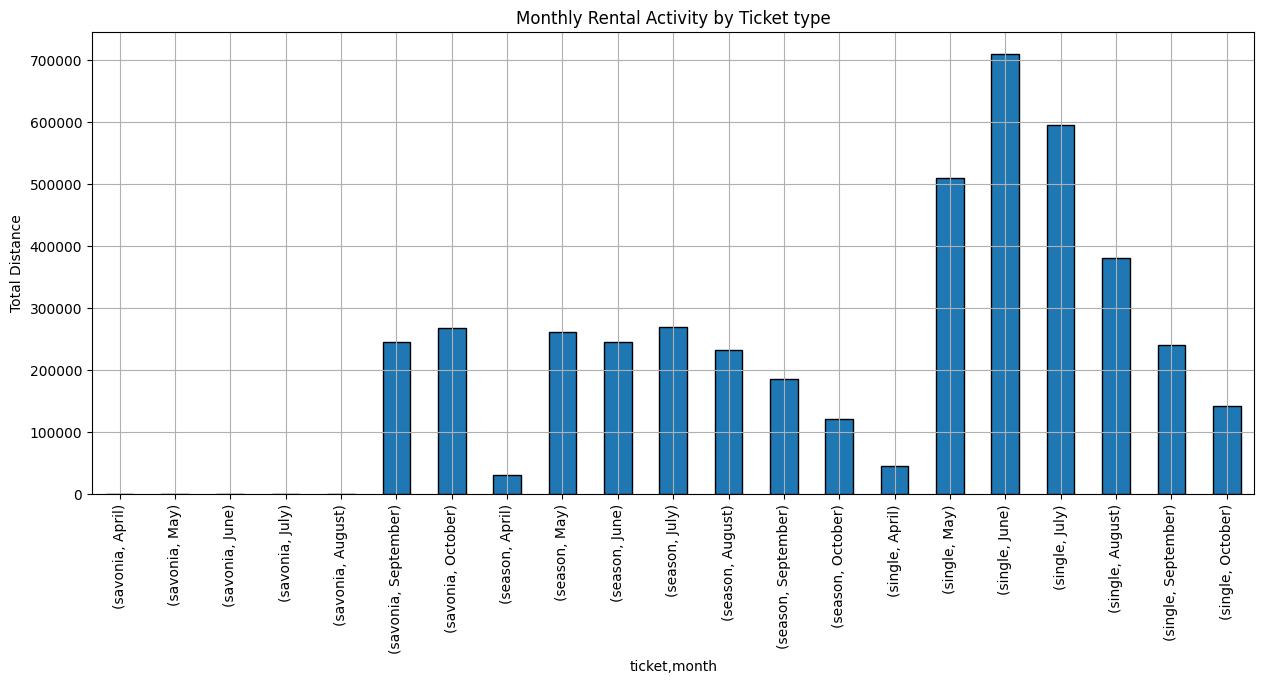

In [ ]:
# setting edge color and title
g_df8["distance"].sum().plot(kind = "bar", edgecolor = "black", title = "Monthly Rental Activity by Ticket type", figsize =(15,6) )
plt.ylabel("Total Distance") # setting ylabel
plt.grid(True) # setting grid True
plt.show


###Describing the above plot: Examining the results and making comments about the customers

During the months of September and October, bike riders utilizing Savonia tickets covered the greatest overall distance. Conversely, users of Single tickets recorded the highest total distance in May, June, July, and August. In April, riders with Season and Single tickets collectively traveled the longest distance.

The data visualization clearly indicates a spike in monthly rental activity throughout May, June, July, and August, signaling a period of heightened bike usage. In contrast, rental activity remained at a moderate level during September and October . Notably, in April, the monthly rental activity was considerably low, reflecting a limited usage pattern during that specific month.



Therefore, the marketing team should investigate the reasons behind low rental activity during April and take necessary steps for increasing monthly rental activity for all types of tickets during all months.

### ** Find the three stations that have the highest total deficit of bikes (i.e. the largest negative difference between the number of arrived bikes and the number of departured bikes) and the three stations that have the highest total surplus of bikes (i.e. the largest positive difference). Examine your results and make suggestions about how bikes could be relocated.**


In [ ]:
 ### counting arrived bikes of same stations by counting how many times a specific station have occured in location_to column in the dataset
count_arrived_bikes = df["location_to"].value_counts()

### counting departured bikes of same stations by counting how many times a specific station have occured in location_from column in the dataset
count_departured_bikes = df["location_from"].value_counts()


In [ ]:
print(count_departured_bikes) ###printing count_departured_bikes

TORI              347
KAUPPAKATU        200
SATAMA            168
MICROTEKNIA       158
NEULAMÄKI         146
PUIJONLAAKSO      140
KEILANKANTA       133
TASAVALLANKATU    115
KYS                85
PIRTTI             25
Name: location_from, dtype: int64


In [ ]:
print(count_arrived_bikes) ###printing count_arrived bikes

TORI              332
KAUPPAKATU        246
PUIJONLAAKSO      170
MICROTEKNIA       152
NEULAMÄKI         144
SATAMA            130
TASAVALLANKATU    128
KEILANKANTA       122
KYS                66
PIRTTI             27
Name: location_to, dtype: int64


In [ ]:
### determining net bikes by subtracting the count of arrived bikes and the counts of departured bikes for each station

net_bikes = count_arrived_bikes - count_departured_bikes

In [ ]:
net_bikes ###printing net bikes

KAUPPAKATU        46
KEILANKANTA      -11
KYS              -19
MICROTEKNIA       -6
NEULAMÄKI         -2
PIRTTI             2
PUIJONLAAKSO      30
SATAMA           -38
TASAVALLANKATU    13
TORI             -15
dtype: int64

In [ ]:
### soritng net bikes for getting highest surplus and highest deficit of bikes  in stations

sorted_net_bikes = net_bikes.sort_values(axis = 0,ascending = True, inplace = False)

In [ ]:
sorted_net_bikes

SATAMA           -38
KYS              -19
TORI             -15
KEILANKANTA      -11
MICROTEKNIA       -6
NEULAMÄKI         -2
PIRTTI             2
TASAVALLANKATU    13
PUIJONLAAKSO      30
KAUPPAKATU        46
dtype: int64

### Determing three stations that have the highest total deficit of bikes

In [ ]:

### For  determing highest_deficit of bikes for three stations, we need to print three values from series sorted_net_bikes
highest_deficit_bikes = sorted_net_bikes.head(3)
### printing highest_deficit_bikes
highest_deficit_bikes

SATAMA   -38
KYS      -19
TORI     -15
dtype: int64

### Determining the highest total surplus of bikes:

In [ ]:
### for determining the highest surplus of bikes for three stations, we need to print last three values from series sorted_net_bikes

highest_surplus_bikes = sorted_net_bikes.tail(3) ### getting three largest positive differences of bikes

### for determing 3 stations with highest total surplus, we need to sort the highest surplus of bikes
highest_surplus_bikes_sorted = highest_surplus_bikes.sort_values(axis = 0, ascending = False)
### priting the three stations of highest surplus after sorting
print(highest_surplus_bikes_sorted)

KAUPPAKATU        46
PUIJONLAAKSO      30
TASAVALLANKATU    13
dtype: int64


SATAMA, KYS and TORI have the highest deficit of bikes, respectively.
On the other hand, Kauppakatu, Puijonlaakso, and Tasavallankatu have the highest surplus of bikes.

The logistics team should utilize route optimization algorithms to plan the most efficient routes for redistributing bikes. This ensures that bikes are moved from surplus locations, such as,Kauppakatu, Puijonlaakso and Tasavallankatu to highly deficit areas of bikes, such as, Satama, KYS and Tori by using the shortest and most cost-effective paths.

There are high demands of bikes in Satama, KYS and Tori areas. Therefore, the logistics team should manage to get the surplus bikes and should supply more addiitonal bikes to these places.

###(4p) For each trip in the data set, calculate its net energy gain, which is defined as the difference between the energy collected and consumed during a trip. Visualise the distribution of this new variable. Make comments about how much battery levels tend to change during trips.

In [ ]:
###calculating net energy gain by finding out differences between energy_collected and energy_used variable, for each trip
df["net_energy_gain"] = df["energy_collected"] - df["energy_used"]

In [ ]:
df # printing the dataframe

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected,net_energy_gain
0,single,0.35,September,MICROTEKNIA,PUIJONLAAKSO,411.0,2150.0,enabled,19.0,2.7,-16.3
1,single,1.20,May,SATAMA,KEILANKANTA,1411.0,7130.0,enabled,53.8,15.3,-38.5
2,savonia,0.50,September,TASAVALLANKATU,NEULAMÄKI,1308.0,5420.0,enabled,43.0,9.9,-33.1
3,savonia,0.50,October,TORI,KAUPPAKATU,1036.0,1180.0,enabled,6.5,2.1,-4.4
4,single,0.30,September,TORI,TORI,319.0,1120.0,enabled,13.7,1.2,-12.5
...,...,...,...,...,...,...,...,...,...,...,...
1768,single,1.00,July,KEILANKANTA,KAUPPAKATU,1167.0,6070.0,enabled,34.3,3.0,-31.3
1769,savonia,0.50,October,KAUPPAKATU,TORI,836.0,960.0,enabled,8.0,2.7,-5.3
1770,single,0.20,July,TORI,SATAMA,199.0,930.0,enabled,3.7,3.6,-0.1
1772,savonia,0.50,September,MICROTEKNIA,PUIJONLAAKSO,610.0,2460.0,enabled,36.5,6.9,-29.6


# Visualizing the net_energy_gain

### Plotting a histogram for visualizing the net energy gain

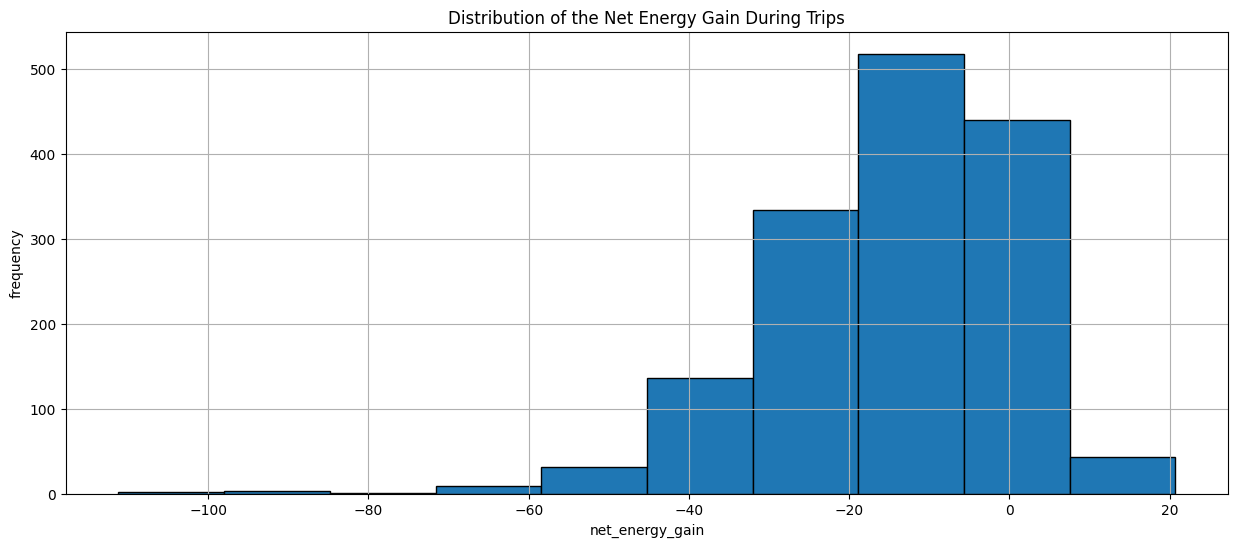

In [ ]:
df["net_energy_gain"].plot(kind = "hist",edgecolor = "black", figsize=(15,6)) ###plotting histogram and setting edgecolor as black and figsize
plt.xlabel("net_energy_gain") ### providing x-label
plt.ylabel("frequency") ###providing y-label
plt.title("Distribution of the Net Energy Gain During Trips") ### title of the visualized histogram
plt.grid(True) ### setting grid true for getting grid lines in the visual
plt.show() # showing the plot

### Upon examining the plot above, it is evident that most electric bikes experienced energy losses during the majority of their trips. However, there are approximately 450 instances of energy gain.

Considering that many of the bikes exhibit inefficiencies in their systems, it is recommended that the logistics team takes steps to address these issues. This may involve upgrading the charging stations to improve the efficiency of the charging process. Additionally, they should consider enhancing the battery storage capacities of the bikes to increase their energy efficiency levels.

### Scatter plot: Visualizing the change of battery levels during the trips

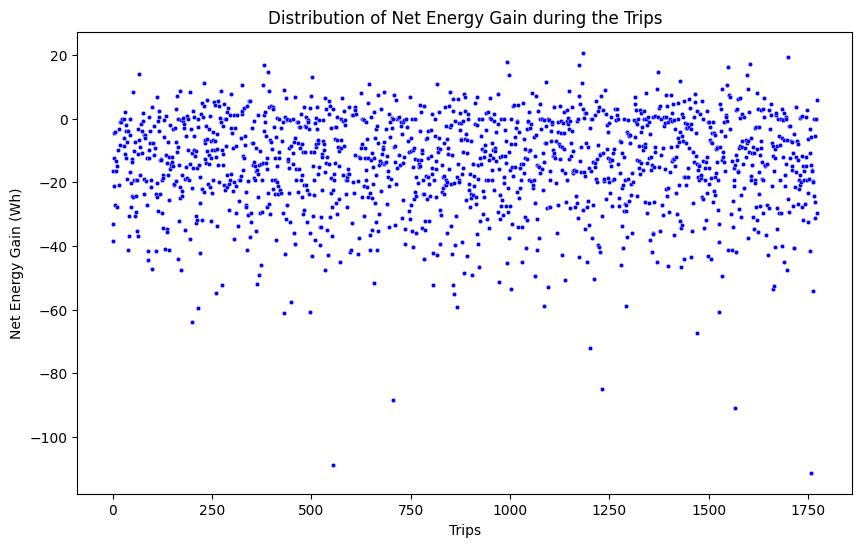

In [ ]:
plt.figure(figsize=(10, 6)) # setting figure size
sns.scatterplot(data=df, x=df.index, y="net_energy_gain", color="b", s=10)  # plotting the scatterplot
plt.xlabel("Trips") # setting x-label
plt.ylabel("Net Energy Gain (Wh)") # setting y-label
plt.title("Distribution of Net Energy Gain during the Trips") # setting the title
plt.show() # displaying the plot

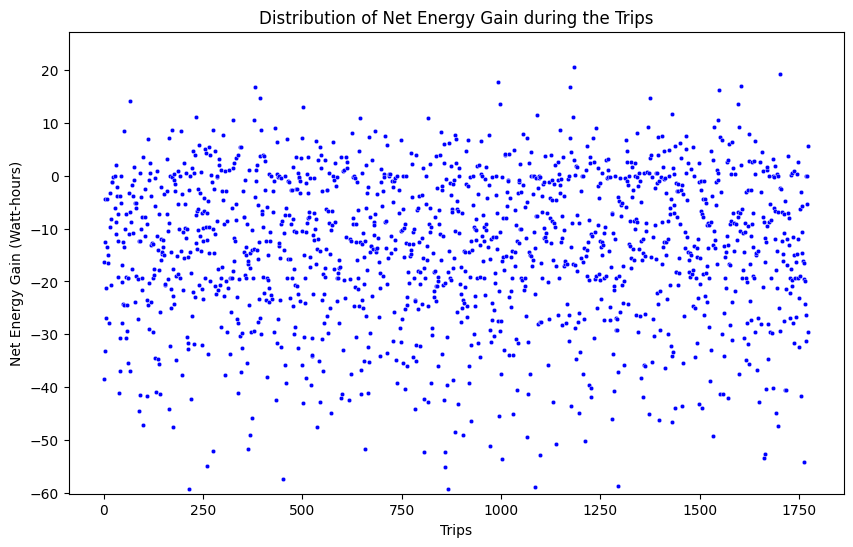

In [ ]:
# plotting the previous plot by changing the ylimit for better clarity
plt.figure(figsize=(10, 6)) # setting the figure size

sns.scatterplot(data=df, x=df.index, y="net_energy_gain", color="b", s=10) # setting the funciton of scatterplot

plt.ylim(-60.20) # setting the y-limit
plt.xlabel("Trips") # setting the x label
plt.ylabel("Net Energy Gain (Watt-hours)") # setting the y-label
plt.title("Distribution of Net Energy Gain during the Trips") # setting title
plt.show()

There is no correlation between the number of trips and the net energy gain.

### **Hypothesis Testing**

# Is there statistical evidence to claim that the travel times tend to be shorter or longer for the single than for the season ticket type. Justify your design choices, interpret the results and use your discoveries to make conclusions about customers.



For determining the differences between travel durations of single and season ticket types, I need to perform  a statistical test after determining whether the two data from single ticket types and season ticket types are normally distributed or not .




In [ ]:
travel_times_single = df[df["ticket"]=="single"]["duration"] ### travel times of single type ticket
travel_times_season = df[df["ticket"]=="season"]["duration"] ### travel times of season type ticket

In [ ]:
travel_times_single ### printing travel times of single type tickets

0        411.0
1       1411.0
4        319.0
5       1185.0
6        817.0
         ...  
1762    1597.0
1763    1066.0
1767    4400.0
1768    1167.0
1770     199.0
Name: duration, Length: 827, dtype: float64

In [ ]:
travel_times_season ### printing travel times of season types of tickets

8        797.0
11      1014.0
12       822.0
16       905.0
28       233.0
         ...  
1756     256.0
1761     934.0
1765     696.0
1766      19.0
1773     478.0
Name: duration, Length: 465, dtype: float64

In [ ]:
### counting sample size of single type tickets
length_single= len(travel_times_single)
print(length_single)

827


In [ ]:
### counting sample size of season type tickets
length_season = len(travel_times_season)
print(length_season)

465


Shapiro- Wilk Test: This is a statistical test which is performed on a dataset from a sample, to check whether that dataset folllows a normal distribution or not.


Null Hypothesis (H0): The data in the sample follows a normal distribution.

Alternative Hypothesis (H1): The data in the sample does not follow a normal distribution.


Decision Rules:

We choose significance level = 0.05

if p-value <= 0.05: The null hypothesis (H0) should be rejected. It could be concluded that the data does not follow normal distribution.


if p - value > 0.05: It is failed to reject the null hypothesis(H0). It could be concluded that the data does not significantly divert from normal distribution.


In [ ]:
### writing functions for performing normality test (shapiro test) on data of a specific group

def check_normality(data,group_name):
  (stats,p_val) = shapiro(data)

  ### if p <= 0 0.05, then the data significantly diverts from normality
  if p_val <= 0.05:
    print(f"statistics: {stats}")
    print(f"p-value: {p_val}")
    print(f"data is not normally distributed for {group_name}")

  ### if p > 0.05, then the data does not significantly divert from normality
  if p_val > 0.05:
    print(f"statistics: {stats}")
    print(f"p-value: {p_val}")
    print(f" data is normally distributed for {group_name}")

In [ ]:
### normality test for duration of single type ticket

check_normality(travel_times_single,"single")

statistics: 0.4006955623626709
p-value: 1.401298464324817e-45
data is not normally distributed for single


The travel durations of "single" ticket types significantly divert from normality.

In [ ]:
### normality test for duration of season type ticket

check_normality(travel_times_season,"season")

statistics: 0.9607822299003601
p-value: 8.494552283799806e-10
data is not normally distributed for season


The travel durations of "season" tickets significantly divert from normality.

The two samples of time durations of "single" and "season" types are independent of each other. Therefore, we need to perform Mann-Whitney U test for comparing these two different samples.

Null Hypothesis(H0): There is no significant difference in travel durations between "single" and "season" ticket users.

Alternative Hypothesis (H1): There is a difference in travel durations between "single" and "season" ticket users (less than or greater than).

For performing this statistical test, we are performing "two-tailed test" . It checks if the distributions of travel_times_single and travel_times_season are equal or not. Therefore, we set "alternative = two_sided"

In [ ]:
### For performing this statistical test, we are performing "two-tailed test" .
### It checks if the distributions of travel_times_single and travel_times_season are equal or not. Therefore, we set "alternative = two_sided"

(statistic,pvalue) = stats.mannwhitneyu(travel_times_single, travel_times_season, use_continuity = True,alternative = "two-sided")
print("Statistic:",statistic)
print("P-value:", pvalue)

Statistic: 199185.5
P-value: 0.28323369961199674


As p_value= 0.283 >0.05, we failed to reject the null hypothesis. Therefore,  there is no statistically significant difference in travel durations between the "single" and "season" types of ticket users.

 Therefore, there is not enough evidence to claim that the travel times tend to be either shorter or longer for the "single" than for the "season" ticket type.

As there is no statistically signifcant difference between the travel durations of these groups, it could be concluded that the customers who bought "single" type tickets travelled are statistically likely to travel a similar duration  as those who bought "season" type tickets, based on the given data analysis.

The hypothesis of marketing team that "trip durations tend to be different between the customers who have a season ticket and the customers who buy single tickets" is rejected based on statistical evidence.

# (4p) Is there statistical evidence to claim that the travel distance positively correlates with the average rate at which electricity is consumed during the trip? Justify your design choices, interpret the results and use your discoveries to make conclusions about customers.



In [ ]:
travel_dist = df["distance"]


### average rate at which electricity is consumed during the trip
average_energy_used = df["energy_used"]/df["duration"]

In [ ]:
travel_dist

0       2150.0
1       7130.0
2       5420.0
3       1180.0
4       1120.0
         ...  
1768    6070.0
1769     960.0
1770     930.0
1772    2460.0
1773    2250.0
Name: distance, Length: 1517, dtype: float64

In [ ]:
average_energy_used

0       0.046229
1       0.038129
2       0.032875
3       0.006274
4       0.042947
          ...   
1768    0.029392
1769    0.009569
1770    0.018593
1772    0.059836
1773    0.016946
Length: 1517, dtype: float64

### Performing Shapiro Test for Determining Normal Distribution of travel_distance and average energy used values for a trip

In [ ]:
check_normality(travel_dist," distance travlled") ## checking normal distribution for distance travelled

statistics: 0.8703638315200806
p-value: 1.054489972539099e-33
data is not normally distributed for  distance travlled


In [ ]:
check_normality(average_energy_used, " average rate of energy used") ### checking normal distribution of average rate of energy used

statistics: 0.4344117045402527
p-value: 0.0
data is not normally distributed for  average rate of energy used


Therefore, travel_dis and  average_energy_used significantly divert from normality. So, we need to perform the spearman rank correlation test.

The below hypotheses should be verified by Spearman Rank correlation Test.

###Null Hypothesis(H0): There is no significant monotonic correlation between distance travelled and the average rate of energy used during the trips.

###Alternative Hypothesis(H1): There is a significant monotonic correlation between distance travelled and the average rate of energy used during the trips.



In [ ]:
# hypothesis testing after getting p value from Spearman ranked test for correlation checking of categorical variables

def hypothesis_testing(p_value):
  if p_value <= 0.05:
   print("There is a significant correlation between the variables")
  if p_value > 0.05:
    print("There is no significant correlation between the variables")

### Performing Spearman Rank Correlation test:


In [ ]:
corr_coff , p_val = scipy.stats.spearmanr(travel_dist,average_energy_used) # performing Spearman Rank Test
print("correlation:",corr_coff) # printing correlation
print("p value:",p_val) # printing p value

correlation: 0.2562269025996438
p value: 3.624808194596901e-24


In [ ]:
hypothesis_testing(p_val) # printing p_value

There is a significant correlation between the variables


There is  weak  positive correlation between distance travelled in a trip and the average rate of energy used in a trip as correlation = 0.25 >.30.

As p value = 3.624808194596901e-24, there is a strong evidence to reject the null hypothesis.Therefore,this correlation is statistically significant.

### Plotting a scatter plot of the variables



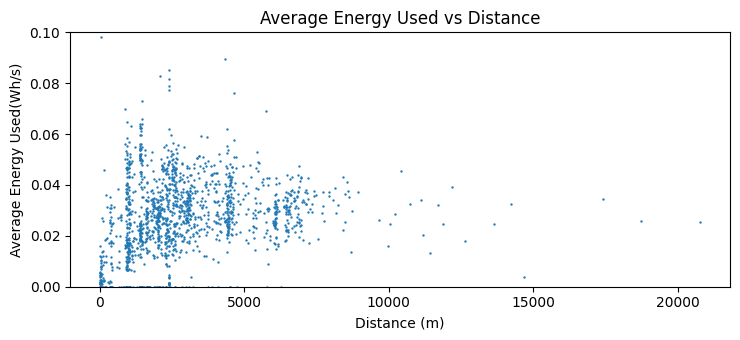

In [ ]:



plt.rcParams["figure.figsize"] = [7.50, 3.50] # setting size of figures
plt.rcParams["figure.autolayout"] = True ## setting auto-layout true

plt.scatter(travel_dist,average_energy_used, s = 0.5) # setting scatter plot

plt.xlabel("Distance (m)") # setting x -label
plt.ylabel("Average Energy Used(Wh/s)") # setting y-label
plt.title("Average Energy Used vs Distance" ) # setting title


plt.ylim(0,0.1) # setting y-limit

plt.show()

Text(0.5, 1.0, 'Average Energy Used vs Distance')

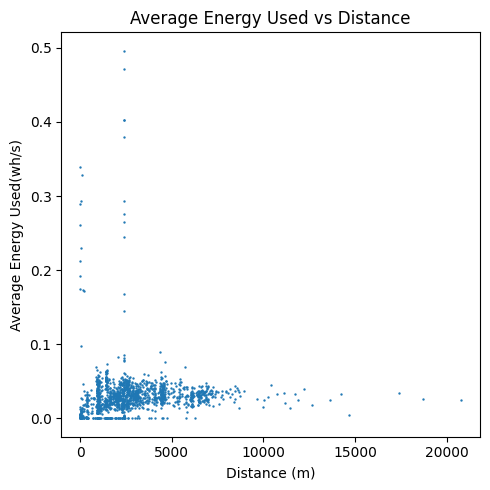

In [ ]:
plt.figure(figsize = (5,5)) # setting figure size
plt.scatter(travel_dist,average_energy_used, s = 0.5) # setting scatter plot

plt.xlabel("Distance (m)") # setting x-label
plt.ylabel("Average Energy Used(wh/s)") # setting y-label
plt.title("Average Energy Used vs Distance" ) # setting the title


From the plot, it could be observed that as distance increases, energy used increases. Therefore, there is a significant and weak positive correlation between energy consumed during the trip and the distance travelled during the trip.

# There is a significant statistical evidence to claim that the travel distance positively correlates with the average rate at which electricity is consumed during the trip.

# Therefore, the belief of marketing team of getting high energy consumed rate as the travel distance increases , is accepted, according to spearman correlation test.

# When customers travel more distance, the energy used by the electric bike increases weakly in positive way.

# 4p) Is there statistical evidence to claim that the savonia ticket type differs from the others with respect to how often the electric assistance is used? Justify your design choices, interpret the results and use your discoveries to make conclusions about customers.

The variables "ticket"  and "assistance" are categorical variables. So, we need to perform Chi-Squared Test for testing categorical variables.

Null Hypothesis(H0): The savonia ticket type does not differ from the others with respect to how often the electric assistance used.

Alternative Hypothesis(H1): The savonia ticket type differs from others with respect to how often the electric assistance is used.

In this case, significance level is chosen as p = 0.05

In [ ]:

# Selecting ticket and assistance columns
ticket_assistance= df[['ticket', 'assistance']]
ticket_assistance

,ticket,assistance
0,single,enabled
1,single,enabled
2,savonia,enabled
3,savonia,enabled
4,single,enabled
...,...,...
1768,single,enabled
1769,savonia,enabled
1770,single,enabled
1772,savonia,enabled


In [ ]:
# Selecting the observations with "enabled" assistance
ticket_assistance_enabled = ticket_assistance[(ticket_assistance['assistance']== 'enabled')]
ticket_assistance_enabled

,ticket,assistance
0,single,enabled
1,single,enabled
2,savonia,enabled
3,savonia,enabled
4,single,enabled
...,...,...
1768,single,enabled
1769,savonia,enabled
1770,single,enabled
1772,savonia,enabled


In [ ]:
# creating a contingency table  for performing chi test
contingency_table = pd.crosstab(ticket_assistance_enabled['ticket'],ticket_assistance_enabled['assistance'])
contingency_table

assistance,enabled
ticket,
savonia,193
season,448
single,778


In [ ]:
from scipy import stats

In [ ]:
### Performing CHi-squared Test
chi2_stat, p_val, dof, expected = scipy.stats.chi2_contingency(contingency_table)
print(p_val)

1.0


As p value>0.05, there is enough statistical evidence to claim that the "savonia" ticket type does not differ from other ticket types with respect to how often the electric assistance is used.

There is no statistical evidence to claim that the savonia ticket type differs from the others with respect to how often the electric assistance is used.

It can be observed that the count of Savonia customers who enabled electric assistance is identical to the count of customers who also enabled electric assistance on electric bikes for other ticket types.

# **Future Directions**

Future directions
The statistical analysis outlined above is definitely not perfect. There must be plenty of other hypotheses that could be examined to improve our rental operations, and the questions we ask above could perhaps be tweaked to better address the needs we have. Since the marketing, logistics and maintenance teams could not come up with other hypotheses or further adjustments, it is up to you to propose improvements to the analysis.

(2p) Choose either (A) or (B) below.

(A) Formulate your own hypothesis about the use of rental electric bikes. Explain why your hypothesis would be important to explore. Describe how the hypothesis could be tested. (You do not have to perform the analysis.)

(B) Point out one or more problems in the questions asked or the approaches used above. Propose changes to address the problem(s). Explain how the changes would improve the statistical analysis.

A.


### My own hypothesis about the use of rental electric bikes is that the higher the  trip duration, the lower the net energy gain tends to be. That is, the travel duration negatively correlates with the net energy gain of the electric bike. In this case, the net energy gain is defined as the differences between energy collected and energy used during a trip.

# Importance of Exploring My Hypothesis:

###My hypothesis is important to explore because if there is a negative correlation between trip duration and net energy gain, the battery life will decrease for longer trips. In this scenario, riders might encounter issues if the bike's battery depletes before reaching their destination. Consequently, these riders might opt not to use the rental service for longer trips, potentially leading to customer dissatisfaction. Therefore, the maintenance team needs to analyze the hypothesis to take necessary steps, such as providing quick charging facilities and positioning charging stations at short intervals from departure stations, if there is statistical evidence to support my hypothesis.


#  Statistical Testing Procedures for Testing My Hypothesis:

### The null hypothesis and alternative hypothesis are listed below for making a decision based on the observed data.

### Null Hypothesis(H0): There is no significant correlation between the travel duration and the net energy gain.

### Alternative Hypothesis (H1): There is a significant negative correlation between the travel duration and the net energy gain.


### For testing this hypothesis, correlation tests like Spearman rank correlation test is required, as the variables duration and net_energy_gain are not normally distributed. Spearman rank correlation is a non-parametric measure of correlation between two variables when the variables are continuous. It evaluates the monotonic correlation between two variables that is, it tests whether one variable consistently increase or decrease with respect to the increment or decrement of other variable. This test is also suitable for testing non-linear relationships between two variables.

### The data of travel duration and the net energy gain is first ranked and the differences between these ranks are used to calculate the correlation coefficient (r). After performing the Spearman Rank correlation test, we would get a correlation coefficient (r)  and  a probability value (p).

### The range of correlation coefficient (r) must be between -1 and 1 including 0.

### The coefficient can range from -1 to 1:

## If r = -1 , then there exists a perfect negative monotonic correlation  the travel duration and the net energy gain of the variables.

### If r = 1, then there exists a perfect positive correlation   between the travel duration and the net energy gain of the electric bikes.

### If r = 0, then there exists no relation between the travel duration and the net energy gain of the electric bikes .


### In statistics, p value is the measure of evidence against null (H0) hypothesis.

### 1. If p value < = 0.05: then there is a strong statistical evidence to reject the null hypothesis .

### There is a significant correlation between the travel duration and the net energy gain of the electric bikes.
  

### 2. If p value > 0.05, then there is no strong evidence to reject the null hypothesis.

### There is no significant correlation between  the travel duration and the net energy gain of the bikes.







